# <a name="0"> Clustering </a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.manifold import TSNE
from matplotlib import rcParams
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierarchy
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA



warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [13]:
#read the data

data_path = '/content/CC GENERAL (1).csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


- **CUST_ID**: Identification of Credit Card holder (Categorical)
- **BALANCE**: Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES**: Amount of purchases made from account
- **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
- **CASH_ADVANCE**: Cash in advance given by the user
- **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY**: How frequently the cash in advance is being paid
- **CASHADVANCETR**: Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX**: Number of purchase transactions made
- **CREDIT_LIMIT**: Limit of Credit Card for the user
- **PAYMENTS**: Amount of Payment done by the user
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user
- **PRCFULLPAYMENT**: Percent of full payment paid by the user
- **TENURE**: Tenure of credit card service for the user


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [14]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [15]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [16]:
# check null value
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

there are nulls in  MINIMUM_PAYMENTS (3.50 %) and CREDIT_LIMIT(0.01 %) columns  we can drop this nulls

All data types are fine!

In [17]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Most columns are skewness we will check this later

In [18]:
# check duplicate
df.duplicated().sum()

0

- no duplicate data

In [19]:
columns=df.columns
columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [20]:
# unique values in each column
for column in columns:
    print(f'{column}: { df[column].nunique() }')

CUST_ID: 8950
BALANCE: 8871
BALANCE_FREQUENCY: 43
PURCHASES: 6203
ONEOFF_PURCHASES: 4014
INSTALLMENTS_PURCHASES: 4452
CASH_ADVANCE: 4323
PURCHASES_FREQUENCY: 47
ONEOFF_PURCHASES_FREQUENCY: 47
PURCHASES_INSTALLMENTS_FREQUENCY: 47
CASH_ADVANCE_FREQUENCY: 54
CASH_ADVANCE_TRX: 65
PURCHASES_TRX: 173
CREDIT_LIMIT: 205
PAYMENTS: 8711
MINIMUM_PAYMENTS: 8636
PRC_FULL_PAYMENT: 47
TENURE: 7


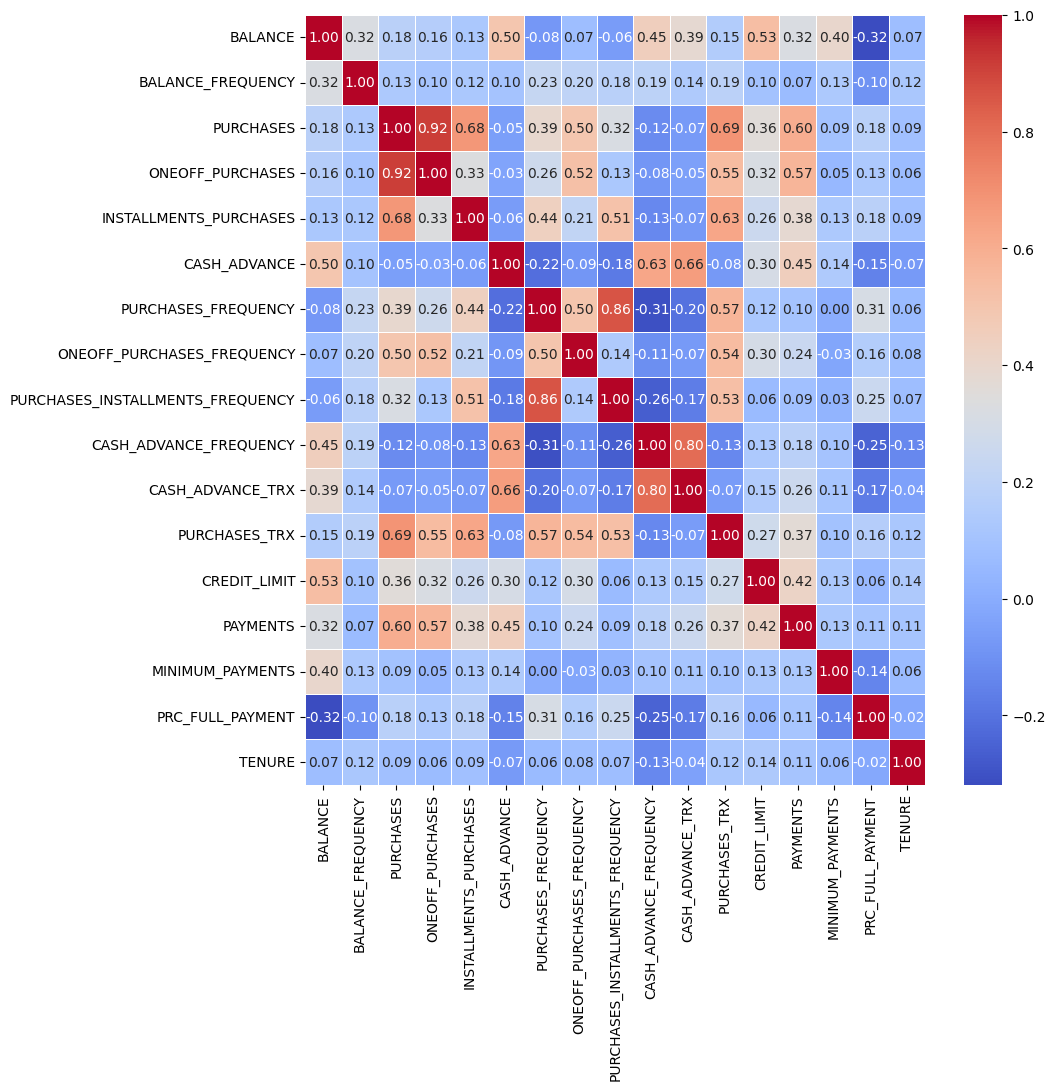

In [21]:
corr_data = df.drop(columns=['CUST_ID'])
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


There are some columns correlated to each other
- PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY
- PURCHASES, ONEOFF_PURCHASES
- CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY

In [22]:
# feel free to investigate what you want

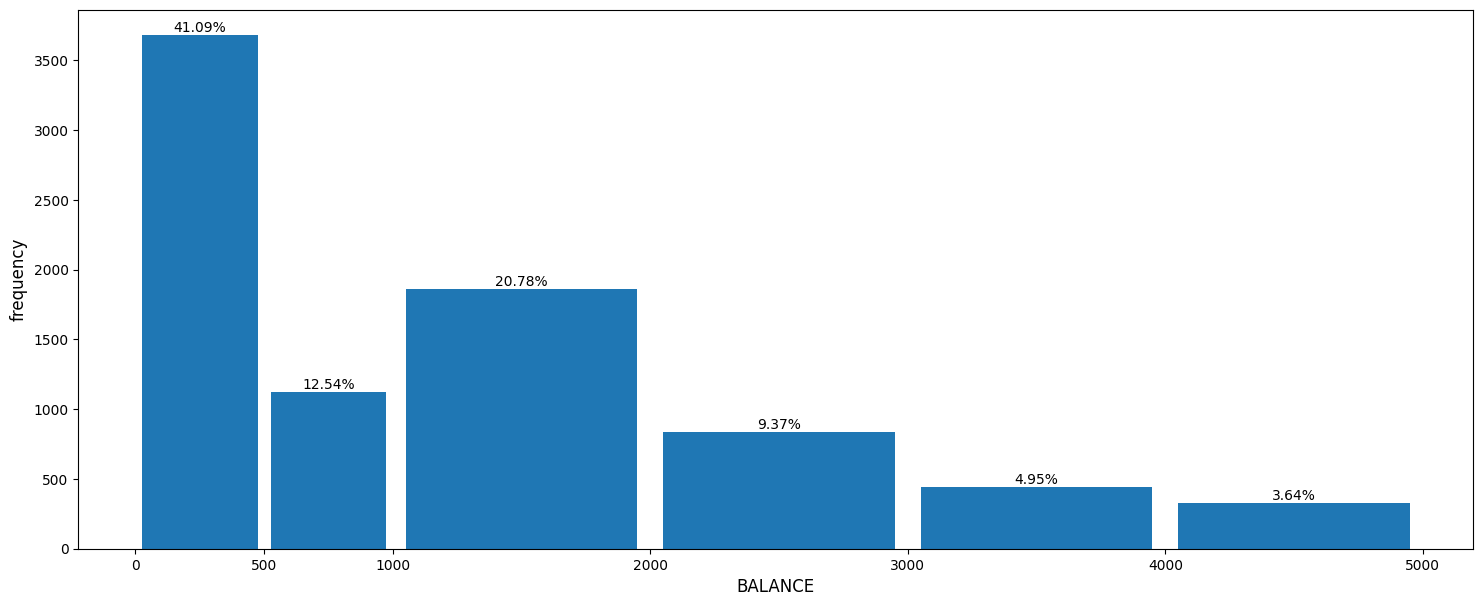

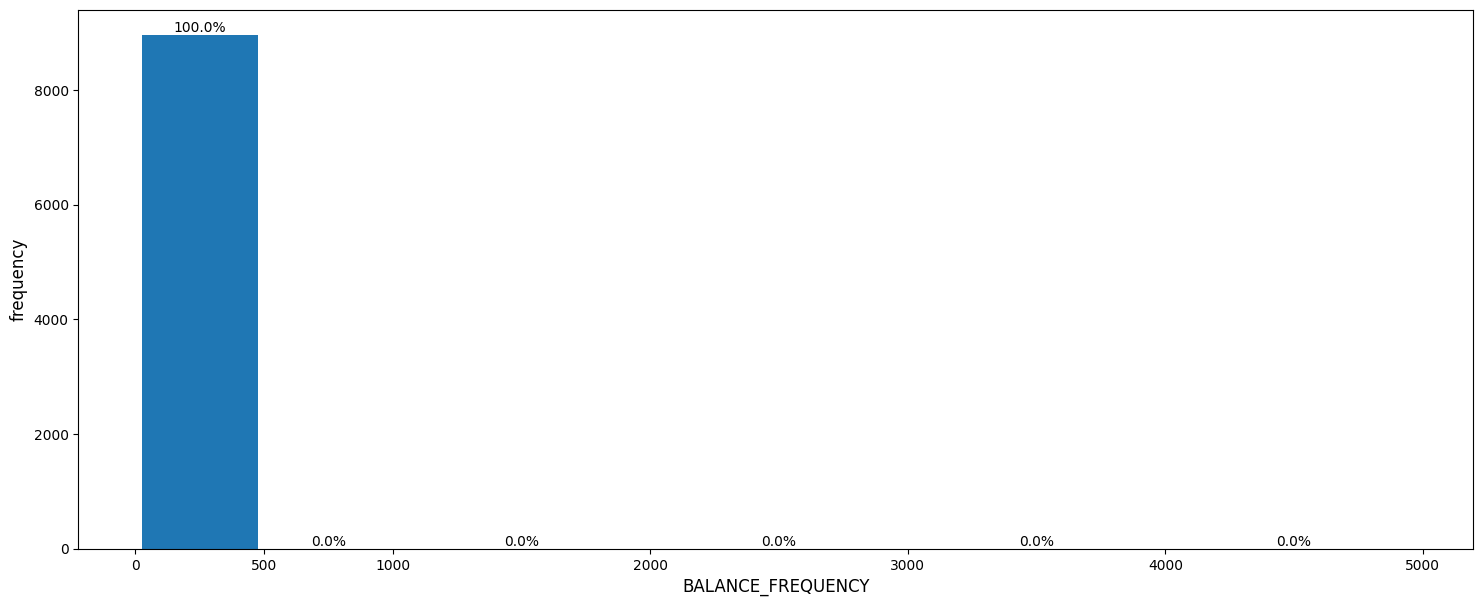

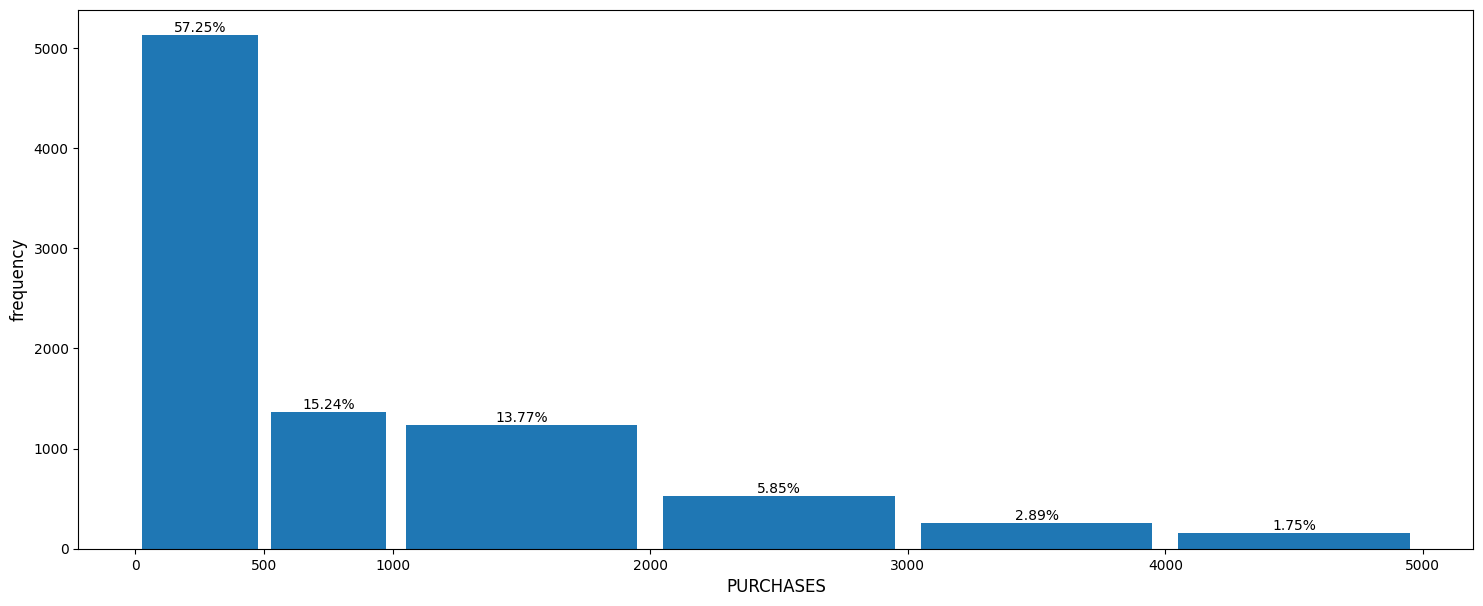

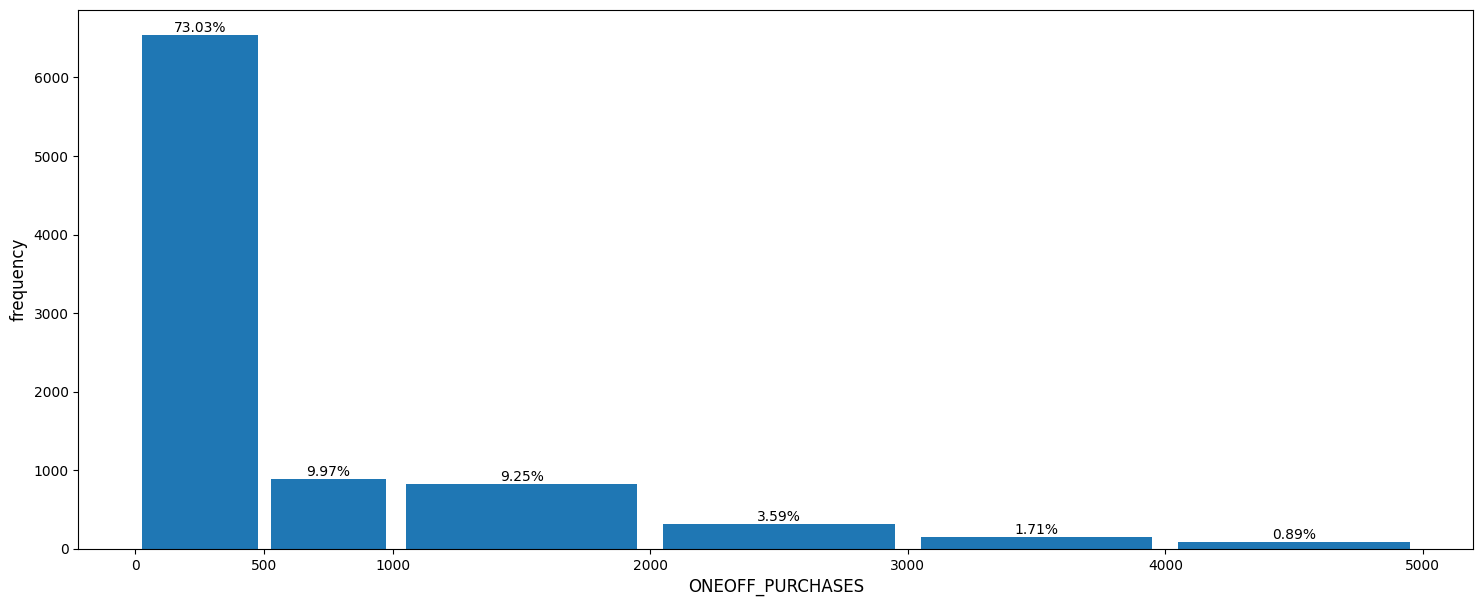

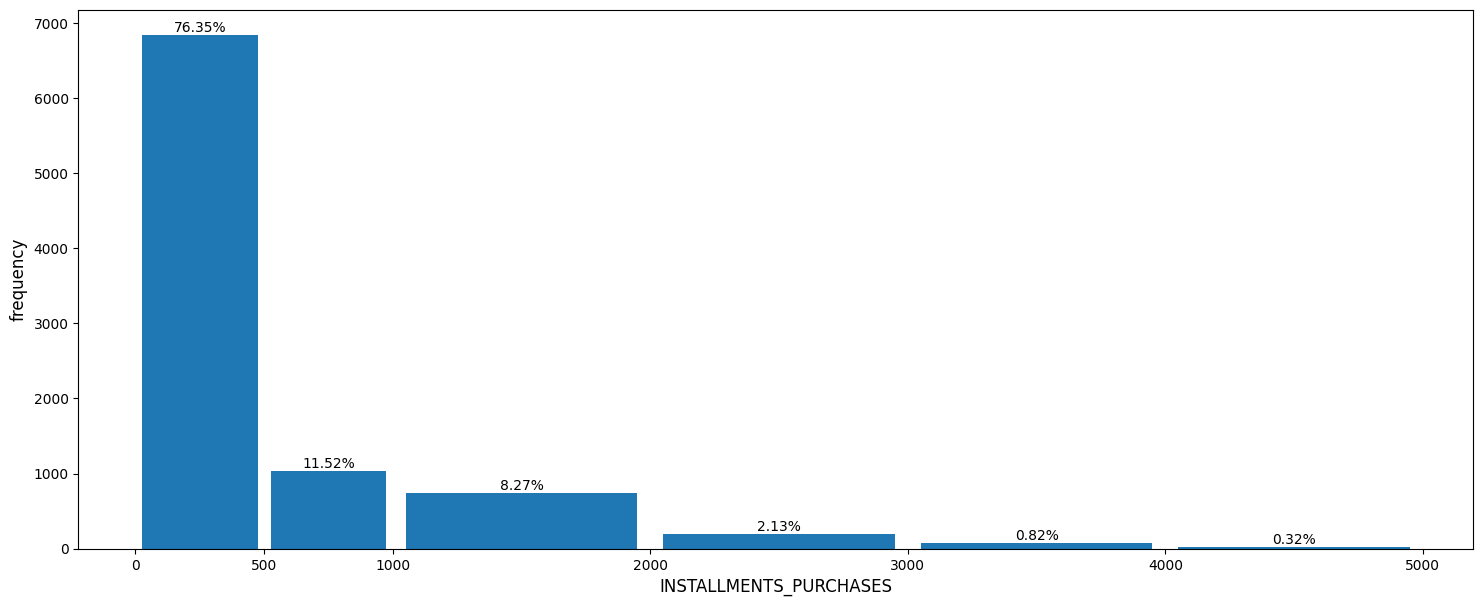

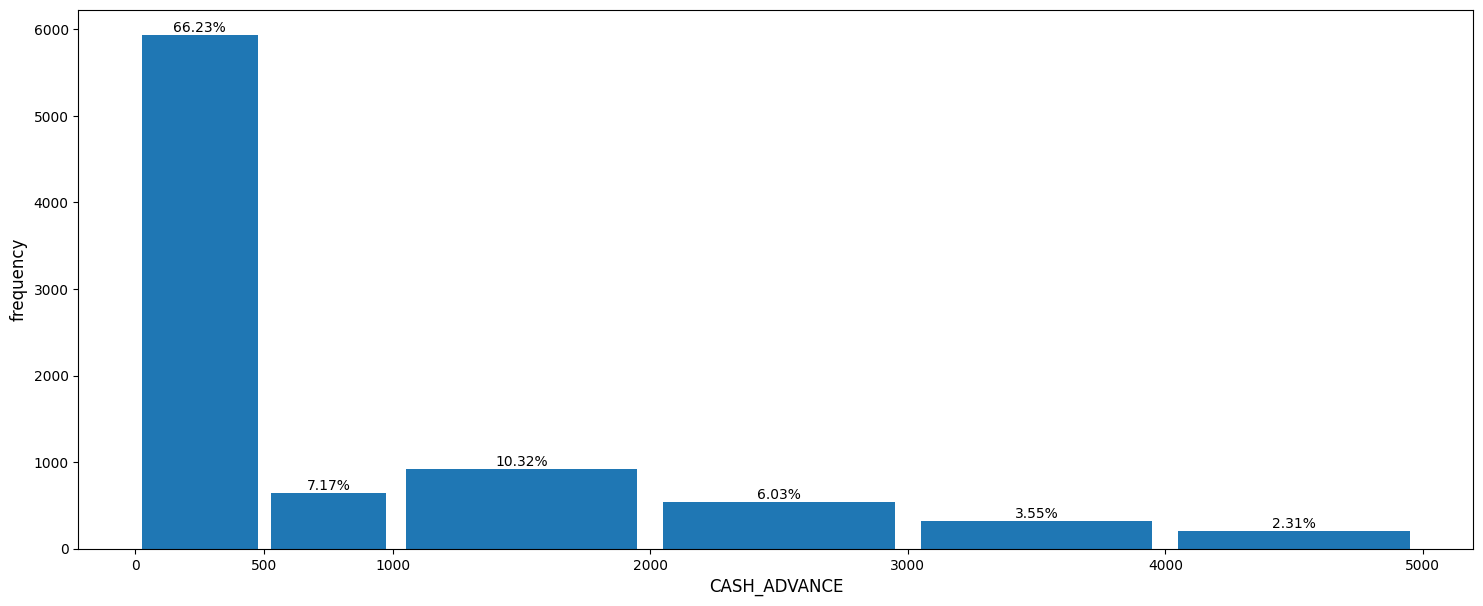

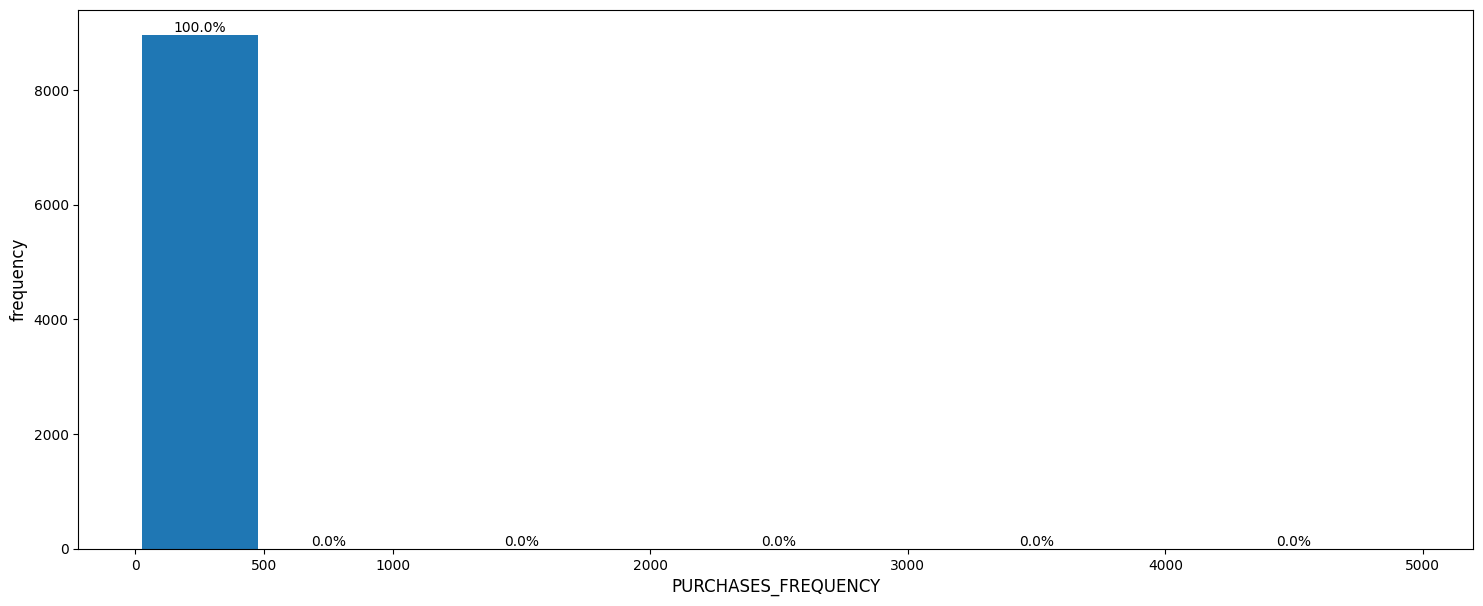

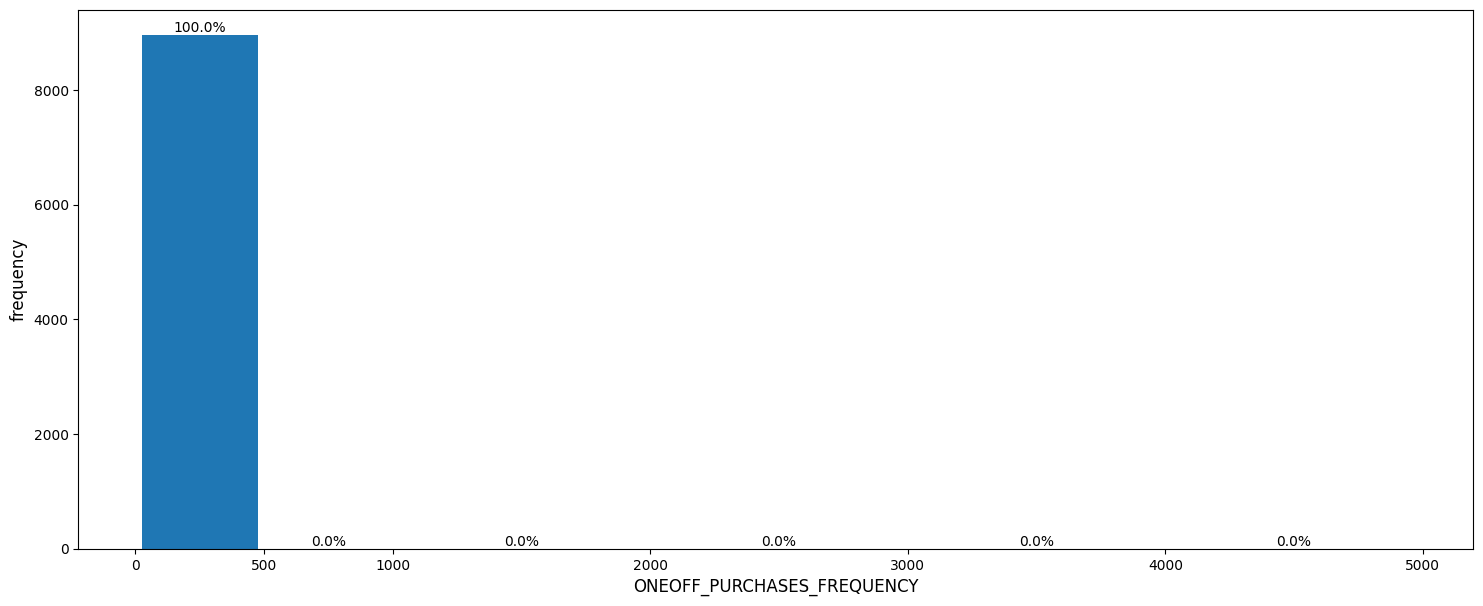

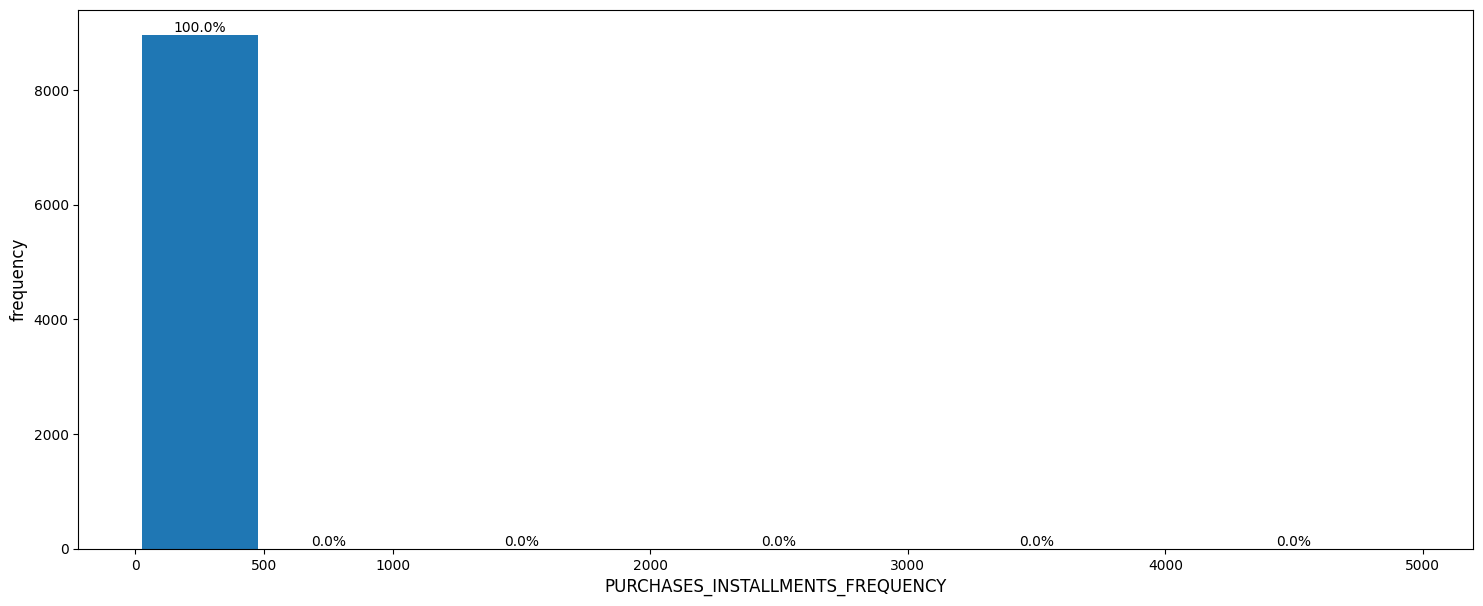

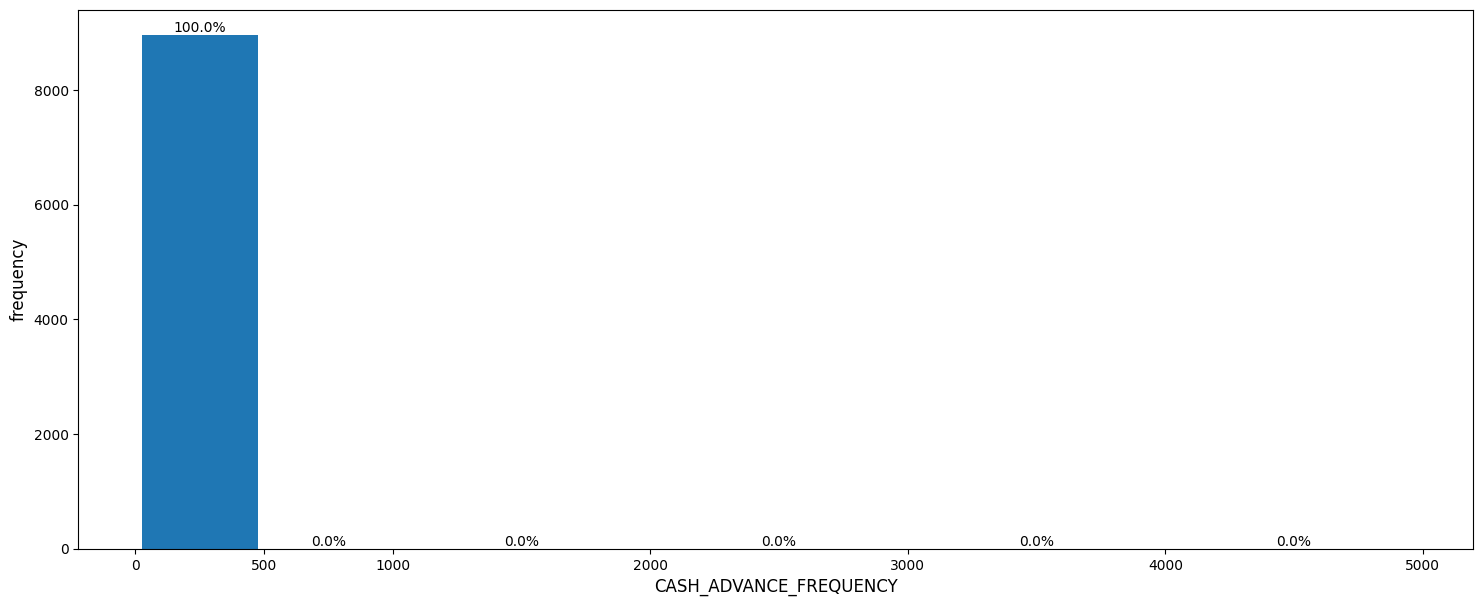

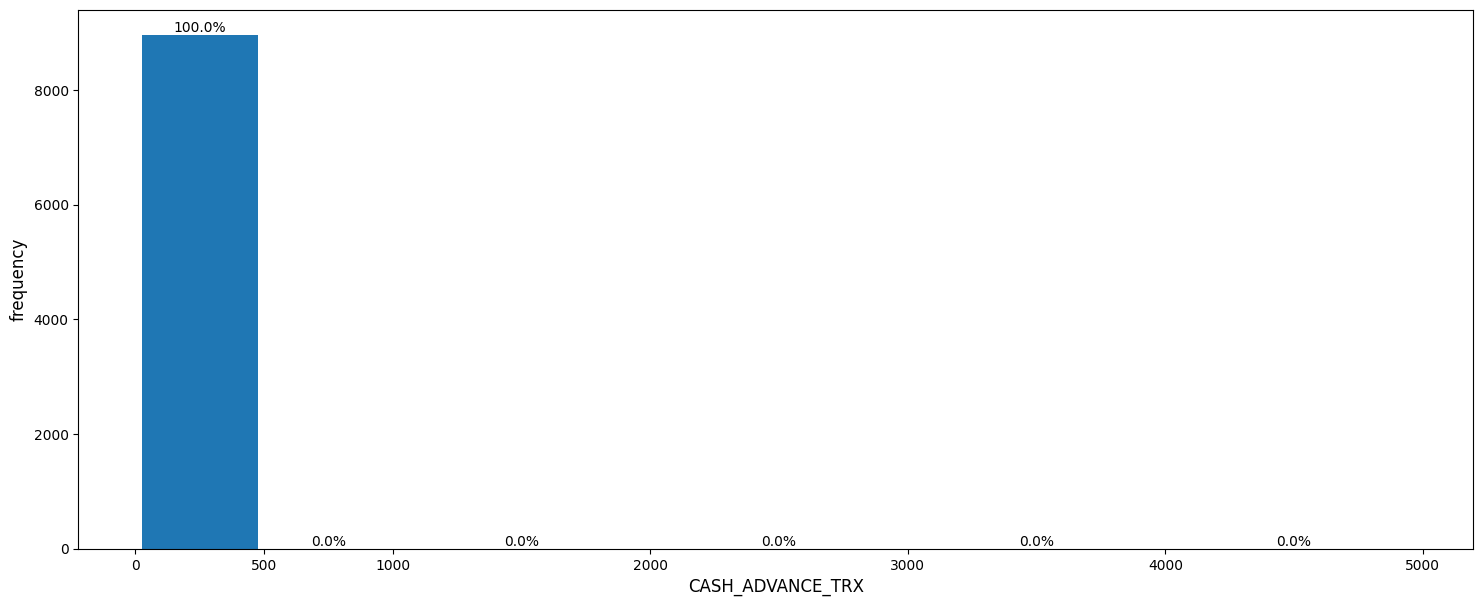

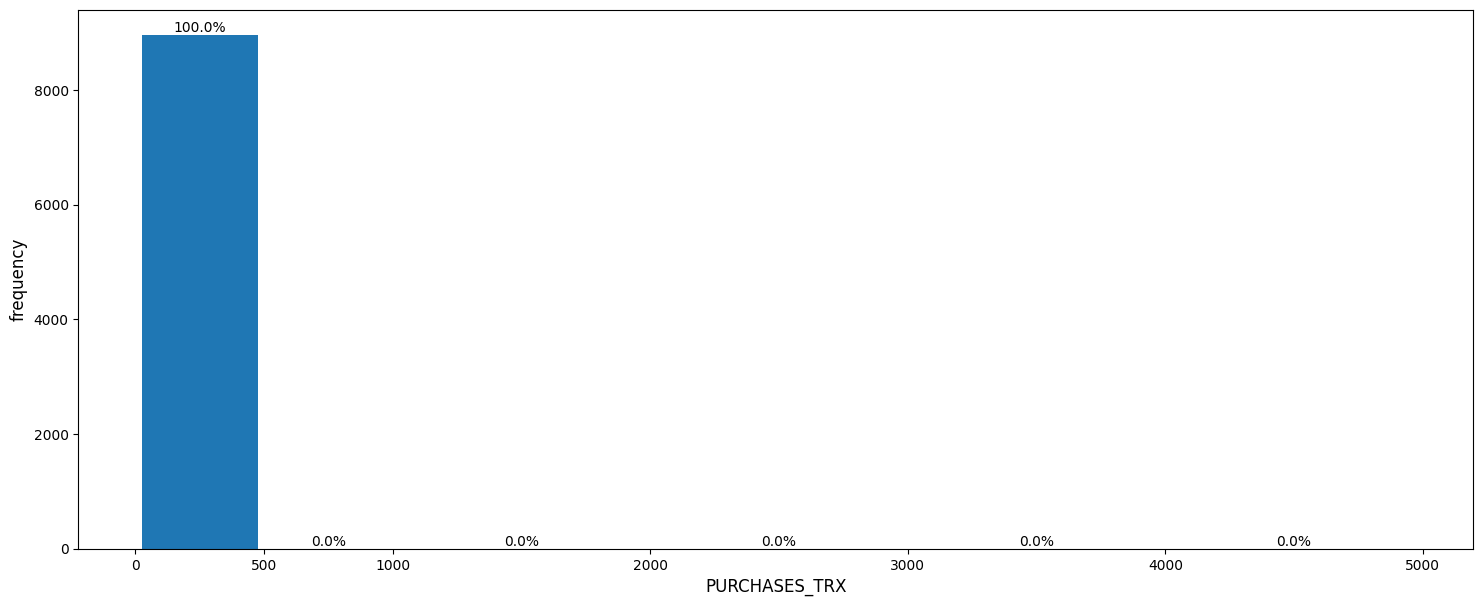

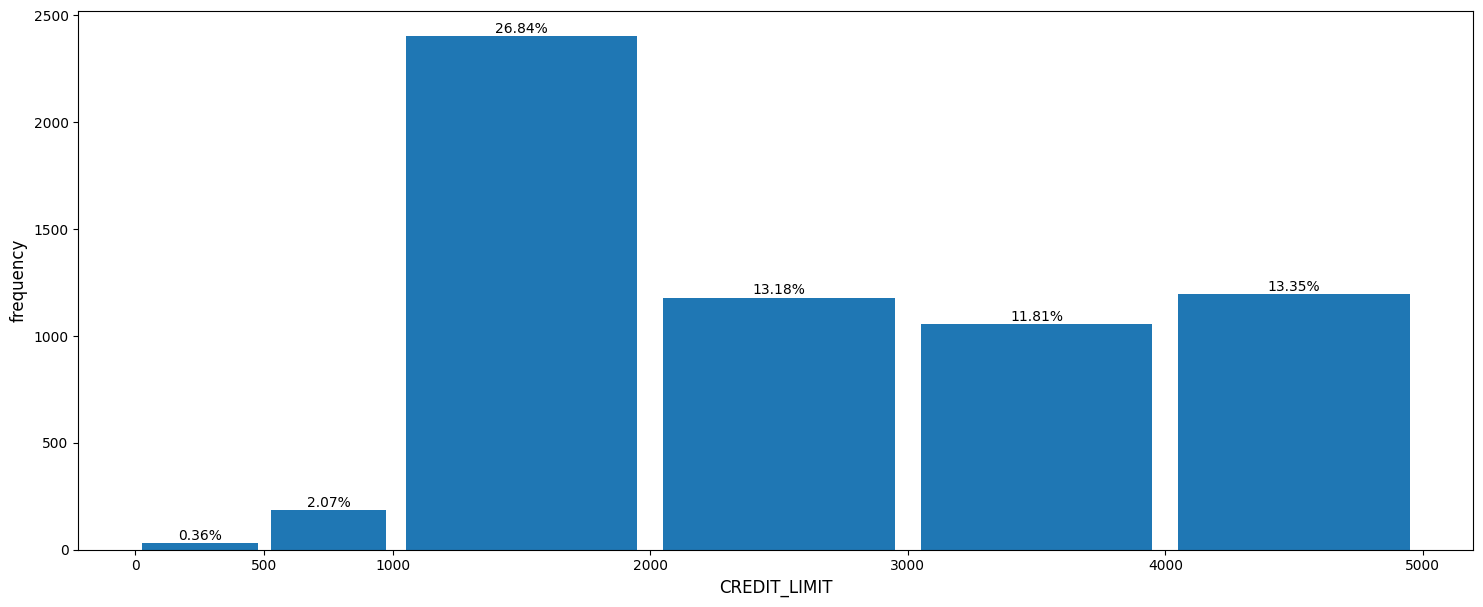

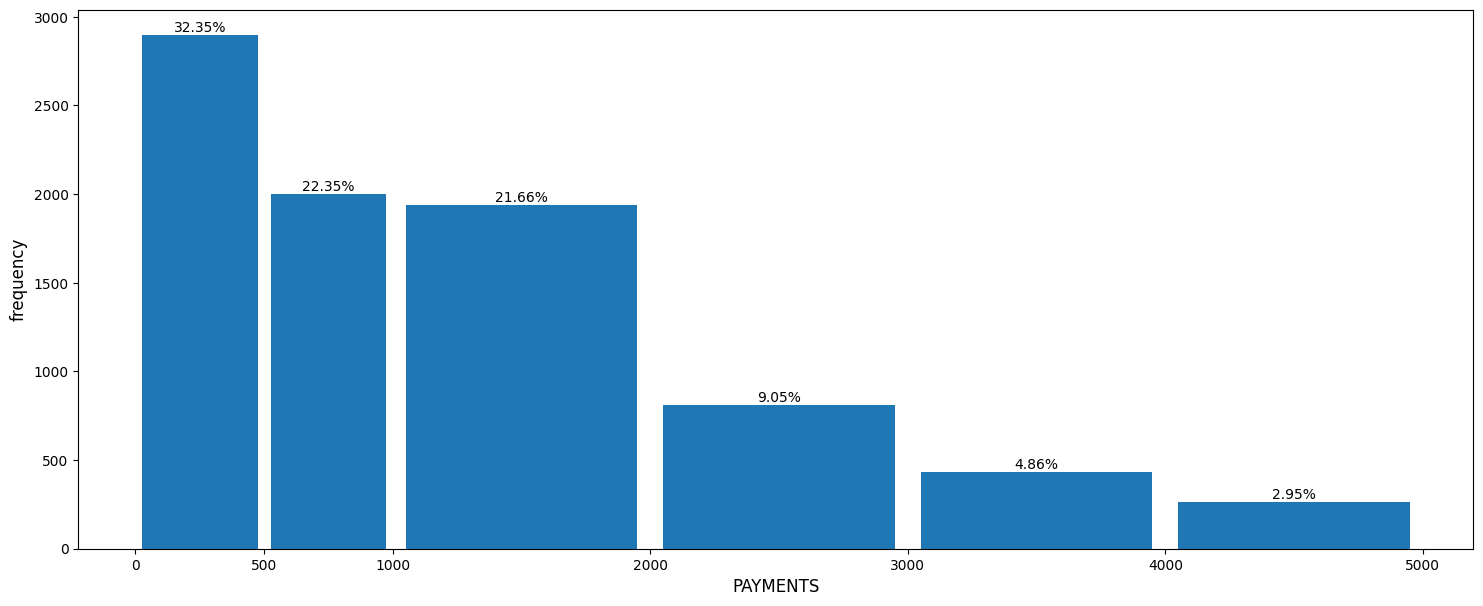

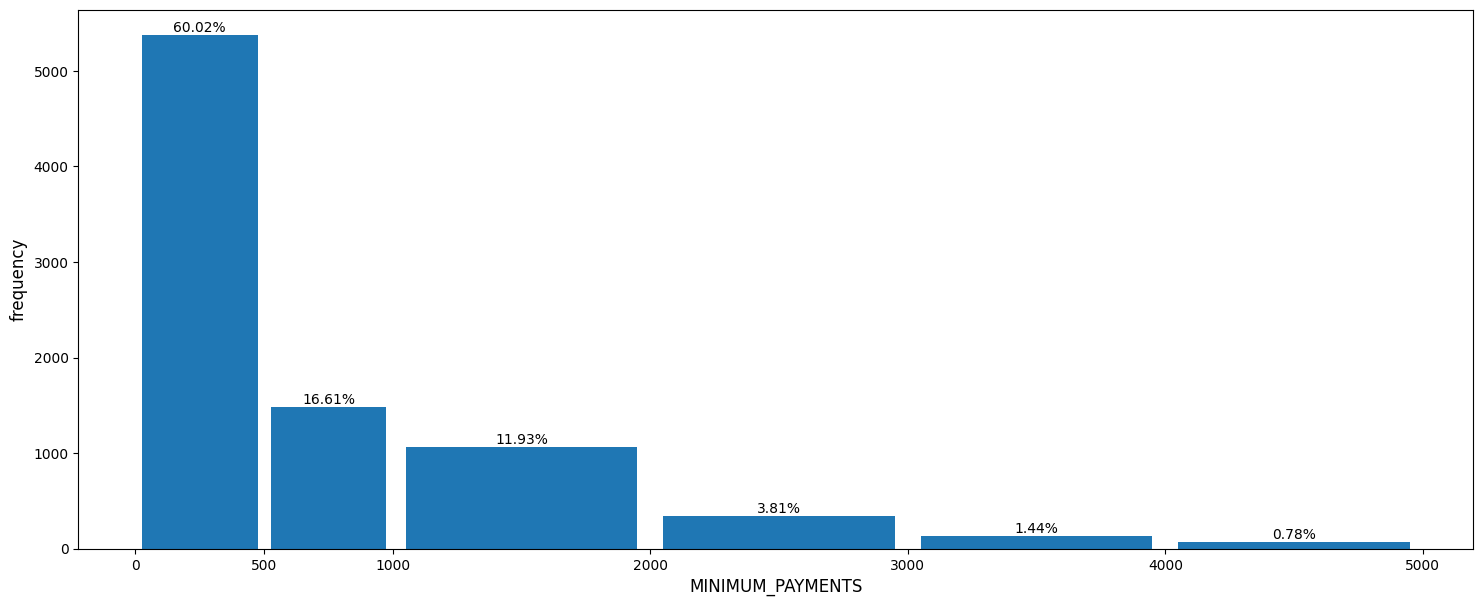

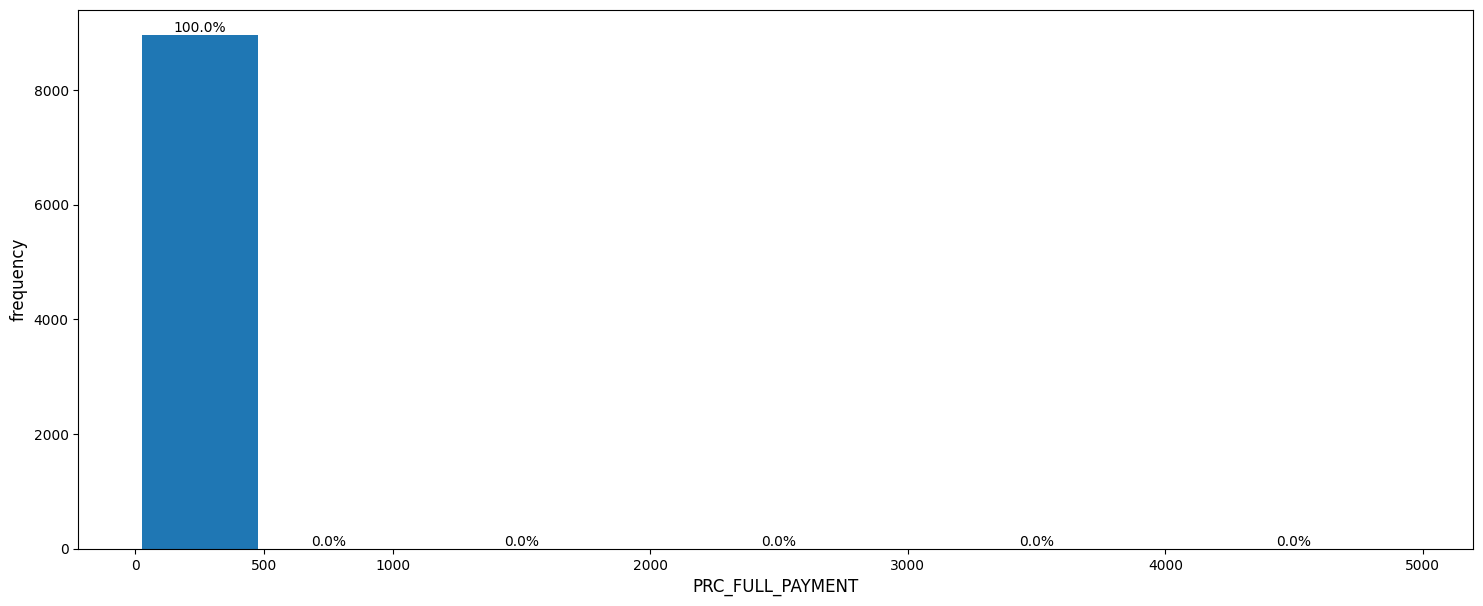

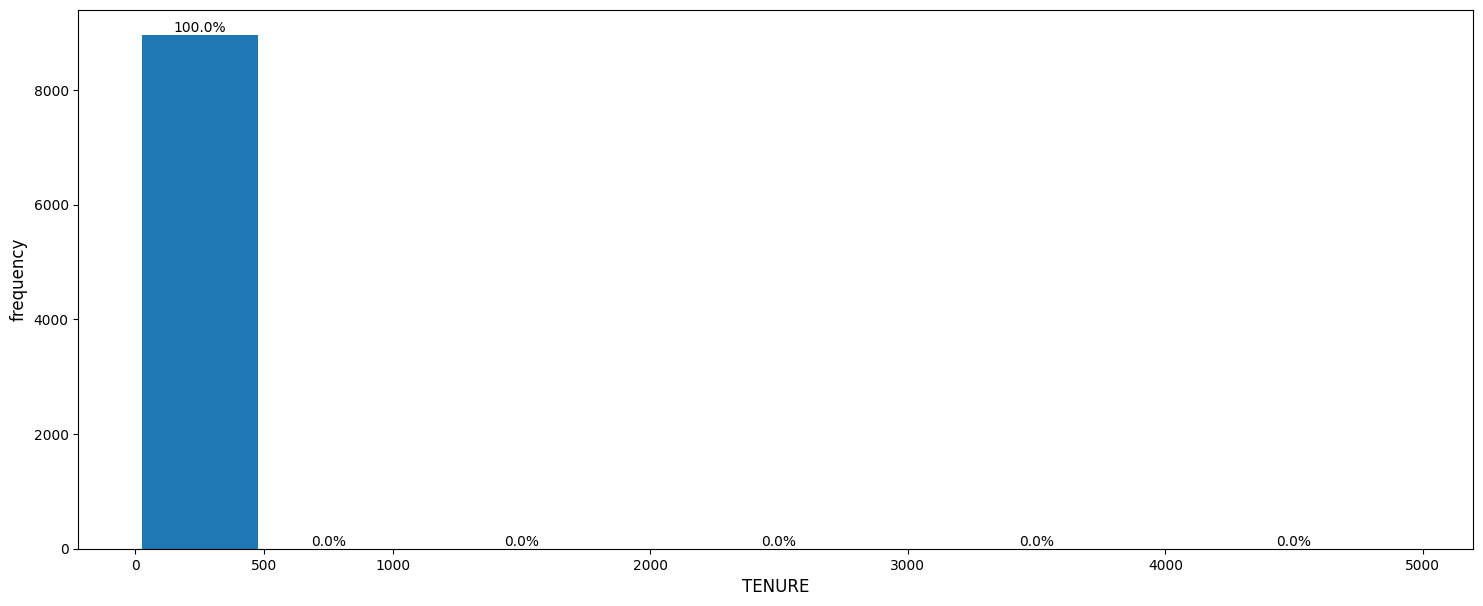

In [152]:
for col in df.drop('CUST_ID',axis=1).columns :
    plt.figure(figsize=(18, 7))

    freq, bins, patches = plt.hist(df[col], bins=[0, 500, 1000, 2000, 3000, 4000, 5000], rwidth=.9)

    bin_centers = np.diff(bins)*0.5 + bins[:-1]

    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
                  xy = (x, height),
                  xytext = (0,0.2),
                  textcoords = "offset points",
                  ha = 'center', va = 'bottom'
                  )
        n = n+1

    plt.xticks([0, 500, 1000, 2000, 3000, 4000, 5000]);
    plt.xlabel(f'{col}', size=12)
    plt.ylabel('frequency', size=12)



From the graphs, we can observe the following insights:

1. **Balance:** The majority of customers have a balance between 0 and 500.
2. **Balance Frequency:** Most customers update their balance frequently, with a score above 0.5.
3. **Purchases:** The distribution of purchases is skewed, with a significant number of customers making purchases below 1000.
4. **One-off Purchases:** Similar to purchases, one-off purchases are also skewed, with most customers making purchases below 1000.
5. **Installments Purchases:** Installments purchases are also skewed, with a majority of customers making purchases below 1000.
6. **Cash Advance:** The distribution of cash advances is skewed, with most customers not taking cash advances.
7. **Purchases Frequency:** Most customers make purchases frequently, with a score above 0.5.
8. **One-off Purchases Frequency:** Similar to purchases frequency, most customers make one-off purchases frequently.
9. **Installments Purchases Frequency:** The majority of customers make installment purchases infrequently.
10. **Cash Advance Frequency:** Most customers do not use cash advances frequently.
11. **Cash Advance TRX:** The distribution of cash advance transactions is skewed, with most customers not making cash advance transactions.
12. **Purchases TRX:** The distribution of purchase transactions is skewed, with a significant number of customers making purchases below 100.
13. **Credit Limit:** The distribution of credit limits is skewed, with most customers having credit limits below 5000.
14. **Payments:** The distribution of payments is skewed, with most customers making payments below 5000.
15. **Minimum Payments:** The distribution of minimum payments is skewed, with most customers making minimum payments below 1000.
16. **PRC Full Payment:** The distribution of percent of full payment is skewed, with most customers paying less than 50% of their balance in full.
17. **Tenure:** The distribution of tenure is skewed, with most customers having a tenure of less than 10 years.


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- i will drop the CUST_ID and some columns that have relation     <br>
2-  there is some null values in MINIMUM_PAYMENTS and CREDIT_LIMIT           <br>
3-  data skewed         <br>

In [24]:
#make a copy for the original dataset
df_copy=df.copy()

In [25]:
df_copy.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [26]:
#solution
df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [27]:
#test
df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**Second issue**


In [28]:
# solution
df_copy = df_copy.dropna()

In [29]:
#test
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                       0.0
BALANCE_FREQUENCY             0.0
PURCHASES                     0.0
INSTALLMENTS_PURCHASES        0.0
CASH_ADVANCE                  0.0
PURCHASES_FREQUENCY           0.0
ONEOFF_PURCHASES_FREQUENCY    0.0
CASH_ADVANCE_TRX              0.0
PURCHASES_TRX                 0.0
CREDIT_LIMIT                  0.0
PAYMENTS                      0.0
MINIMUM_PAYMENTS              0.0
PRC_FULL_PAYMENT              0.0
TENURE                        0.0
dtype: float64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

## StandardScaler

In [31]:
# StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy)
df_copy_StandardScaler = pd.DataFrame(scaled_features, columns=df_copy.columns)
df_copy_StandardScaler.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.744625          -0.370047  -0.429184               -0.354826   
1  0.764152           0.067679  -0.473208               -0.458839   
2  0.426602           0.505405  -0.116413               -0.458839   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.468655            -0.820769                   -0.686280   
1      2.568556            -1.236139                   -0.686280   
2     -0.468655             1.256077                    2.646651   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         -0.479437      -0.517623     -0.962575 -0.543942         -0.305508   
1          0.099258      -0.597054      0.677204  0.796852          0.087689   
2         -0.479437      -0.120467      0.813852 -0.399503         -0.099906   

   PRC_FULL_PAYMENT    TENURE  
0         -0.537727  0.355181  
1          0.212380  0.355181  
2         -0.537727  0.355181

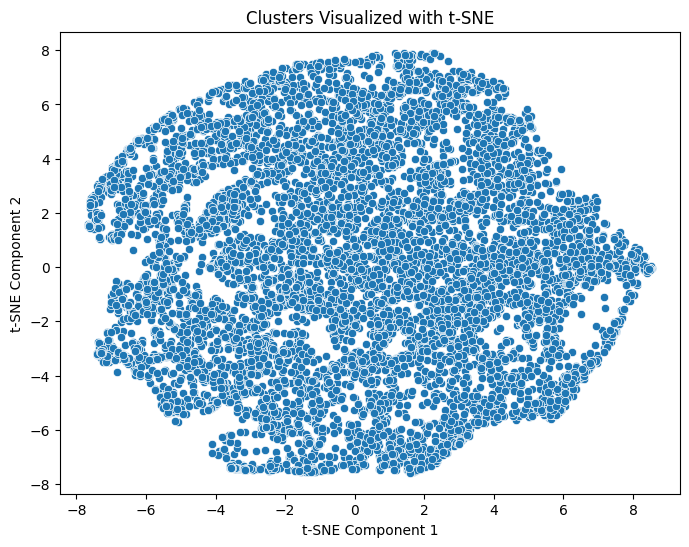

In [32]:
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy_StandardScaler)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## MinMaxScaler

In [33]:
# MinMAxscaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_copy)
df_copy_MinMaxScaler = pd.DataFrame(scaled_features, columns=df_copy.columns)
df_copy_MinMaxScaler.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0  0.002148           0.818182   0.001945                 0.00424   
1  0.168169           0.909091   0.000000                 0.00000   
2  0.131026           1.000000   0.015766                 0.00000   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                         0.0   
1      0.136685             0.000000                         0.0   
2      0.000000             1.000000                         1.0   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0           0.00000       0.005587      0.031720  0.003978          0.001826   
1           0.03252       0.000000      0.232053  0.080892          0.014034   
2           0.00000       0.033520      0.248748  0.012263          0.008210   

   PRC_FULL_PAYMENT  TENURE  
0          0.000000     1.0  
1          0.222222     1.0  
2          0.000000     1.0

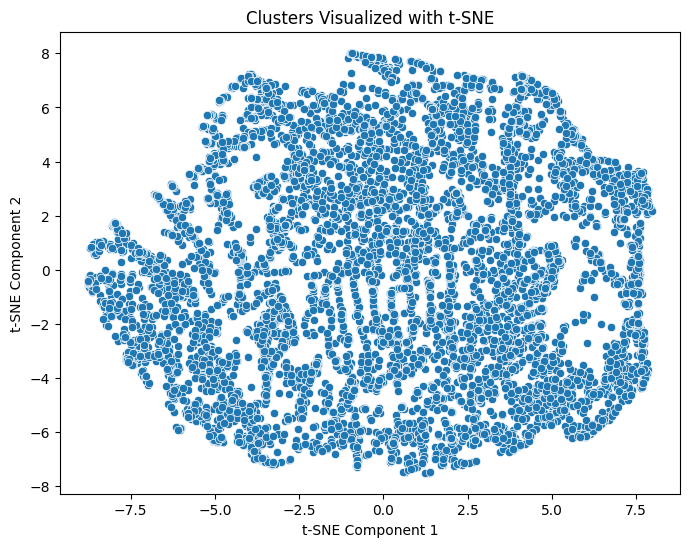

In [34]:
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy_MinMaxScaler)

df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## Roubsetscaler

In [35]:
#  Roubsetscaler
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_copy)
df_copy_Roubsetscaler = pd.DataFrame(scaled_features, columns=df_copy.columns)
df_copy_Roubsetscaler.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.447578               -2.0  -0.253947                0.001270   
1  1.167856               -1.0  -0.340469               -0.195777   
2  0.806445                0.0   0.360748               -0.195777   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0       0.00000            -0.399999                   -0.249999   
1       5.68971            -0.600000                   -0.249999   
2       0.00000             0.600000                    2.750004   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0               0.0      -0.294118     -0.408163 -0.453400         -0.263498   
1               1.0      -0.411765      0.816327  2.092126          1.157778   
2               0.0       0.294118      0.918367 -0.179180          0.479684   

   PRC_FULL_PAYMENT  TENURE  
0          0.000000     0.0  
1          1.333329     0.0  
2          0.000000     0.0

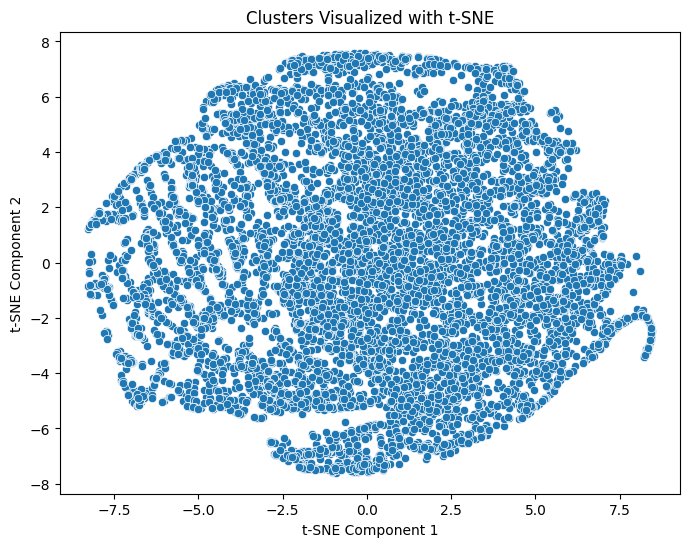

In [36]:
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy_Roubsetscaler)

df_tsne_roubt = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne_roubt)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## log transform

In [37]:
df_copy_log= np.log(df_copy + 0.1)

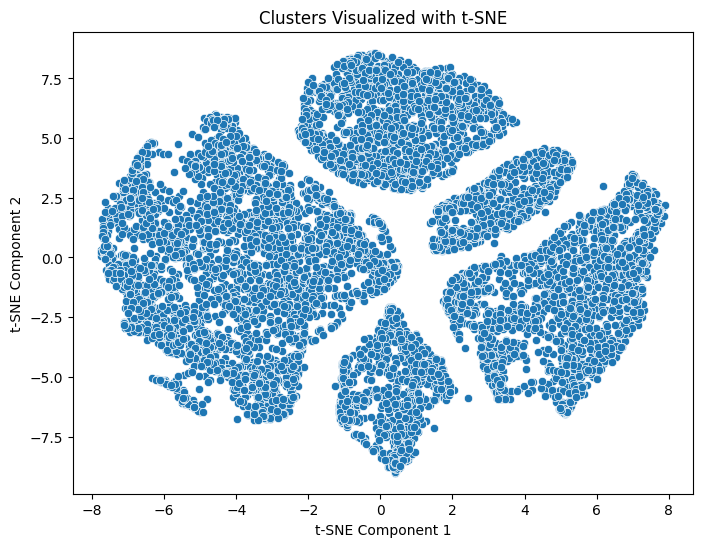

In [38]:
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy_log)

Tsne_data_log = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=Tsne_data_log)
plt.title('Clusters Visualized with t-SNE')
plt.show()

- The best one is log transform because is the best one that split data


##  <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

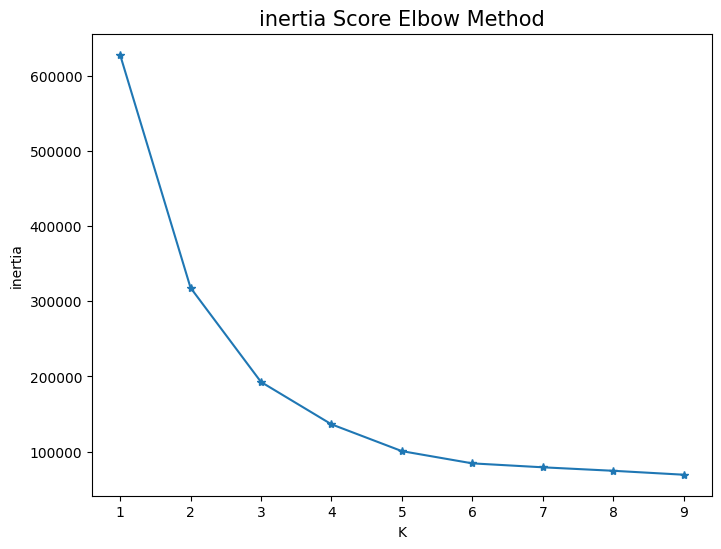

In [39]:
inertia= []

for i in range(1,10):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200, random_state=42)
    km.fit(df_copy_log)
    inertia.append(km.inertia_)

plt.plot(range(1,10),inertia, marker='*')
plt.title('inertia Score Elbow Method', fontsize =15)
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

from Tsne and Elbow method it seems that   The best number of cluster is 5

- my kmeans implemintation

In [40]:
class KMeansClustering:
    def __init__(self, K):
        self.K = K
        self.centroids = None
        self.labels = None

    def fit(self, X, max_iters=100):
        self.centroids = self.kMeansInitCentroids(X)
        for _ in range(max_iters):
            self.labels = self.findClosestCentroids(X)
            self.centroids = self.computeCentroids(X)

    def kMeansInitCentroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        centroids = X[np.random.choice(X.shape[0], size=(self.K), replace=False), :]
        return centroids

    def findClosestCentroids(self, X):
        idx = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            dist = np.linalg.norm(X[i, :] - self.centroids, axis=1)
            idx[i] = np.argmin(dist)
        return idx

    def computeCentroids(self, X):
        Centroids = np.zeros((self.K, X.shape[1]))
        for i in range(self.K):
            Centroids[i, :] = np.mean(X[self.labels == i], axis=0)
        return Centroids

    def predict(self, x):
        dist = np.linalg.norm(x - self.centroids, axis=1)
        label = np.argmin(dist)
        return label

In [42]:
df_copy_log_array = df_copy_log.to_numpy()

In [43]:
kmeans_model = KMeansClustering(K=5)
kmeans_model.fit(df_copy_log_array)

In [46]:
Tsne_data_log['cluster'] = kmeans_model.labels
Tsne_data_log.head(3)

t-SNE Component 1  t-SNE Component 2  cluster
0          -1.615503          -3.169822      3.0
1           6.761675           1.262429      1.0
2           0.173664          -2.795099      4.0

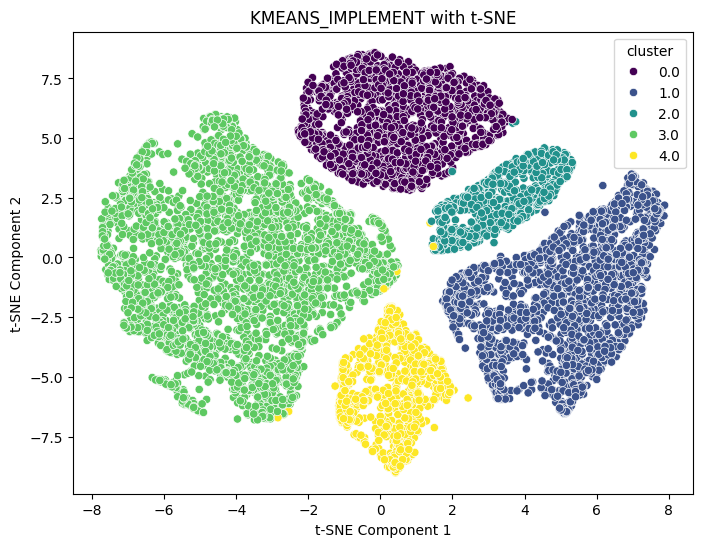

In [48]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data= Tsne_data_log, palette='viridis' )
plt.title('KMEANS_IMPLEMENT with t-SNE')
plt.show()

- Sklearn Kmeans

In [50]:
kmeans = KMeans(n_clusters=5 )

kmeans.fit(df_copy_log)

KMeans(n_clusters=5)

In [51]:
Tsne_data_log['cluster'] = kmeans.labels_
Tsne_data_log.head(3)

t-SNE Component 1  t-SNE Component 2  cluster
0          -1.615503          -3.169822        2
1           6.761675           1.262429        1
2           0.173664          -2.795099        0

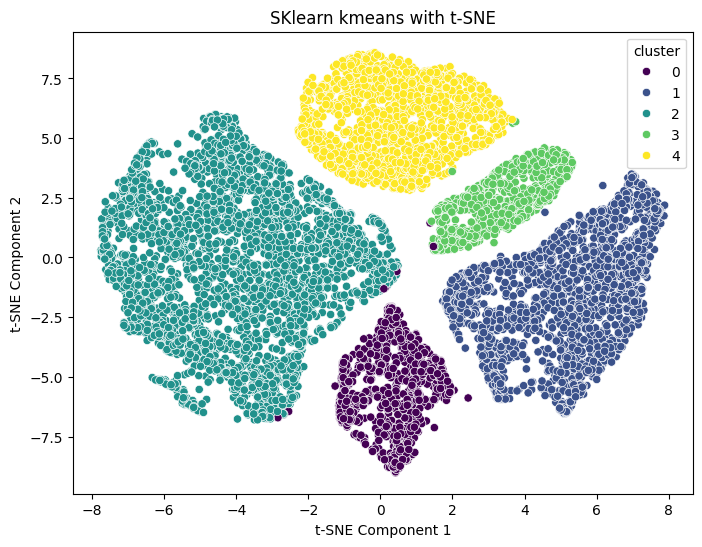

In [52]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data= Tsne_data_log, palette='viridis' )
plt.title('SKlearn kmeans with t-SNE')
plt.show()

there is no diffrance in the result btween my implementation and Sklearn

## Hierarical Clustring

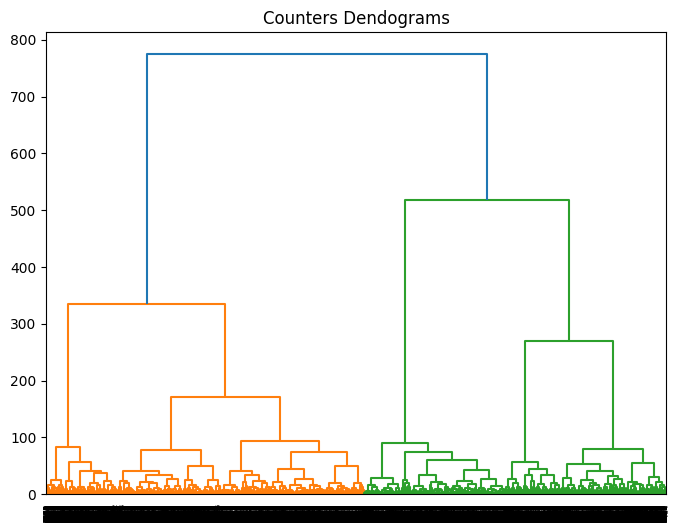

In [54]:
plt.title("Counters Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(y=df_copy_log ,
                                  method='ward',
                                  metric='euclidean'),
                           )

In [138]:
hierarical = AgglomerativeClustering(n_clusters=5)
hierarical.fit(df_copy_log)

AgglomerativeClustering(n_clusters=5)

In [56]:
# Add the cluster information to the reduced data
Tsne_data_log['cluster'] = hierarical.labels_
Tsne_data_log

t-SNE Component 1  t-SNE Component 2  cluster
0             -1.615503          -3.169822        0
1              6.761675           1.262429        2
2              0.173664          -2.795099        1
3              1.946292          -5.489173        1
4             -1.553719           2.465256        0
...                 ...                ...      ...
8631           0.550243          -8.739625        1
8632          -4.991153          -4.557607        0
8633          -3.512663          -4.909050        0
8634           4.973723          -6.308848        2
8635           1.797500           1.674897        4

[8636 rows x 3 columns]

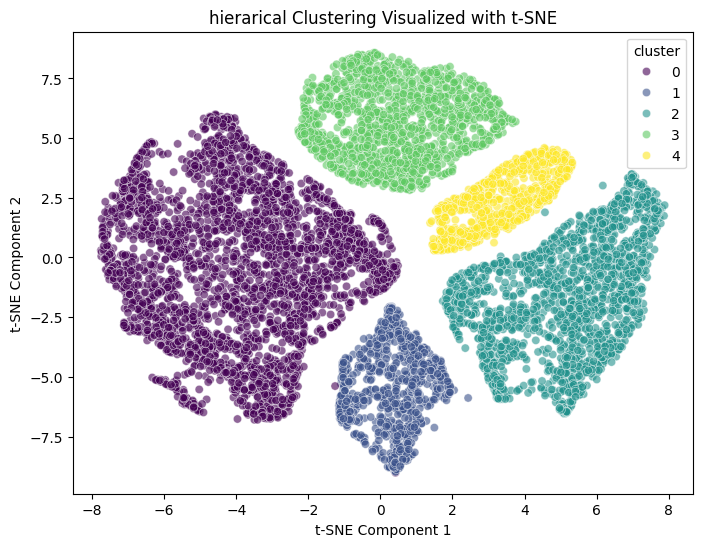

In [59]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=Tsne_data_log, palette='viridis', alpha=0.6)
plt.title('hierarical Clustering Visualized with t-SNE')
plt.show()

## GaussianMixture

In [60]:
# Initialize the GaussianMixture model
GM_model = GaussianMixture(n_components= 5 ,covariance_type='full')
GM_model.fit(df_copy_log)

GaussianMixture(n_components=5)

In [61]:
Tsne_data_log['cluster'] =GM_model.predict(df_copy_log)
Tsne_data_log.head(3)

t-SNE Component 1  t-SNE Component 2  cluster
0          -1.615503          -3.169822        1
1           6.761675           1.262429        3
2           0.173664          -2.795099        2

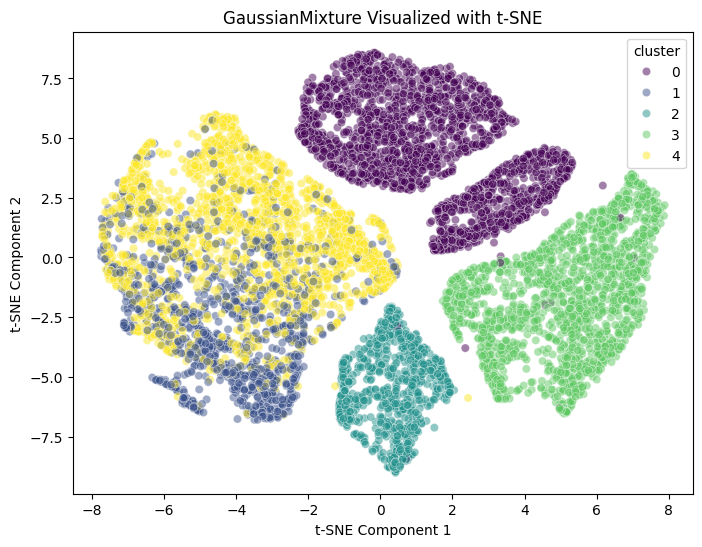

In [63]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=Tsne_data_log, palette='viridis',alpha=0.5)
plt.title('GaussianMixture Visualized with t-SNE')
plt.show()

## DBSCAN

In [64]:
dbscan = DBSCAN(eps=3, min_samples=5).fit(df_copy_log)

dbscan.fit(df_copy_log)

DBSCAN(eps=3)

In [65]:
Tsne_data_log['cluster'] = dbscan.labels_
Tsne_data_log.head(3)

t-SNE Component 1  t-SNE Component 2  cluster
0          -1.615503          -3.169822        0
1           6.761675           1.262429        1
2           0.173664          -2.795099        2

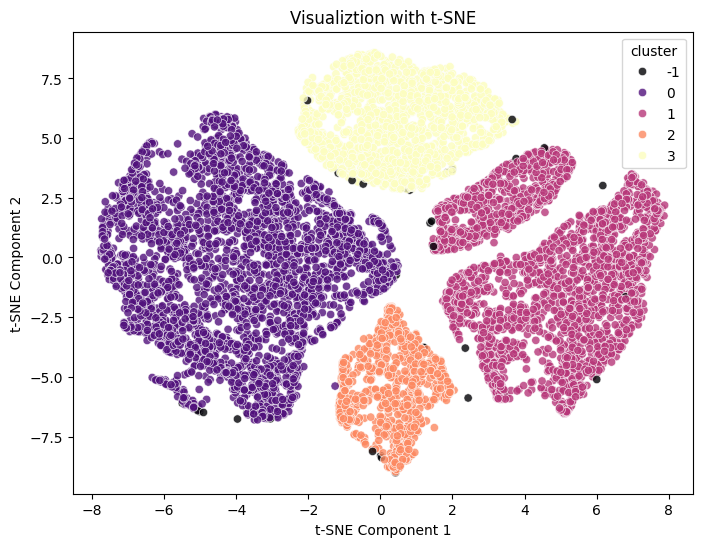

In [67]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data= Tsne_data_log, palette='magma', alpha=0.8 )
plt.title('Visualiztion with t-SNE')
plt.show()

- points with -1  is outliers

### from this algorithmies the Hierarchical Clustering most effective model for clustering customers

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [83]:
# The Silhouette Score is a metric for evaluating the quality of clustering results
from sklearn.metrics import silhouette_score

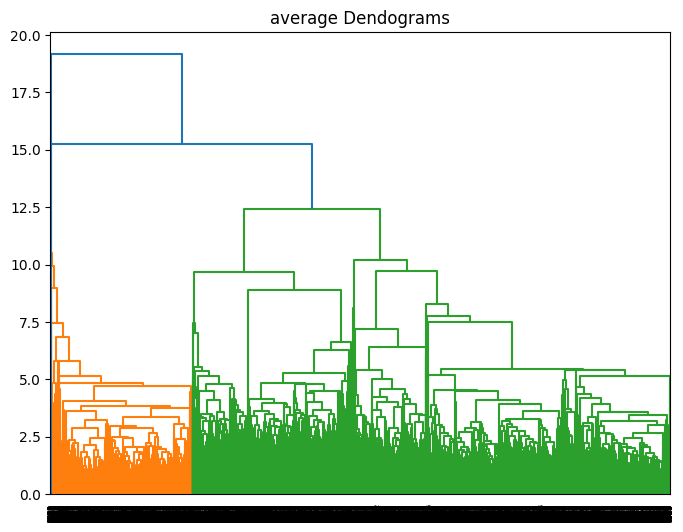

In [89]:
plt.title("average Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(y=df_copy_log ,
                                  method='average',
                                  metric='euclidean'),
                           )

In [92]:
hierarical = AgglomerativeClustering(n_clusters=3,metric='l1',linkage='complete')
hierarical.fit(df_copy_log)

AgglomerativeClustering(linkage='complete', metric='l1', n_clusters=3)

In [93]:
# Add the cluster information to the reduced data
Tsne_data_log['cluster'] = hierarical.labels_
Tsne_data_log

t-SNE Component 1  t-SNE Component 2  cluster
0             -1.615503          -3.169822        2
1              6.761675           1.262429        0
2              0.173664          -2.795099        2
3              1.946292          -5.489173        2
4             -1.553719           2.465256        2
...                 ...                ...      ...
8631           0.550243          -8.739625        0
8632          -4.991153          -4.557607        2
8633          -3.512663          -4.909050        2
8634           4.973723          -6.308848        0
8635           1.797500           1.674897        1

[8636 rows x 3 columns]

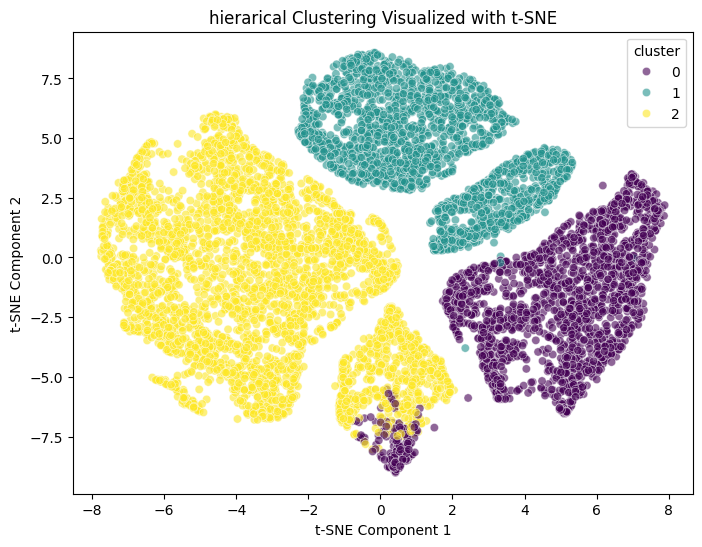

In [94]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=Tsne_data_log, palette='viridis', alpha=0.6)
plt.title('hierarical Clustering Visualized with t-SNE')
plt.show()

In [95]:
hierarical = AgglomerativeClustering(n_clusters=4,metric='l2',linkage='average')
hierarical.fit(df_copy_log)

AgglomerativeClustering(linkage='average', metric='l2', n_clusters=4)

In [97]:
# Add the cluster information to the reduced data
Tsne_data_log['cluster'] = hierarical.labels_
Tsne_data_log.head()

t-SNE Component 1  t-SNE Component 2  cluster
0          -1.615503          -3.169822        2
1           6.761675           1.262429        0
2           0.173664          -2.795099        2
3           1.946292          -5.489173        2
4          -1.553719           2.465256        2

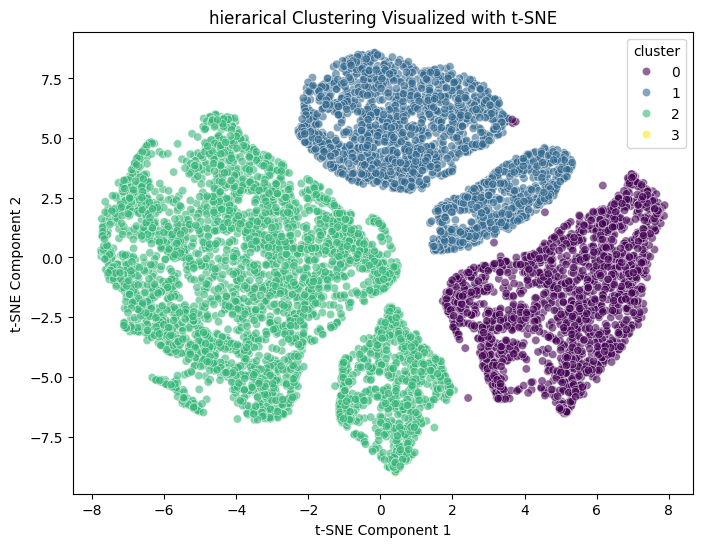

In [98]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=Tsne_data_log, palette='viridis', alpha=0.6)
plt.title('hierarical Clustering Visualized with t-SNE')
plt.show()

In [100]:
hierarical = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='average')
hierarical.fit(df_copy_log)

AgglomerativeClustering(linkage='average', metric='euclidean')

In [101]:
# Add the cluster information to the reduced data
Tsne_data_log['cluster'] = hierarical.labels_
Tsne_data_log.head()

t-SNE Component 1  t-SNE Component 2  cluster
0          -1.615503          -3.169822        0
1           6.761675           1.262429        0
2           0.173664          -2.795099        0
3           1.946292          -5.489173        0
4          -1.553719           2.465256        0

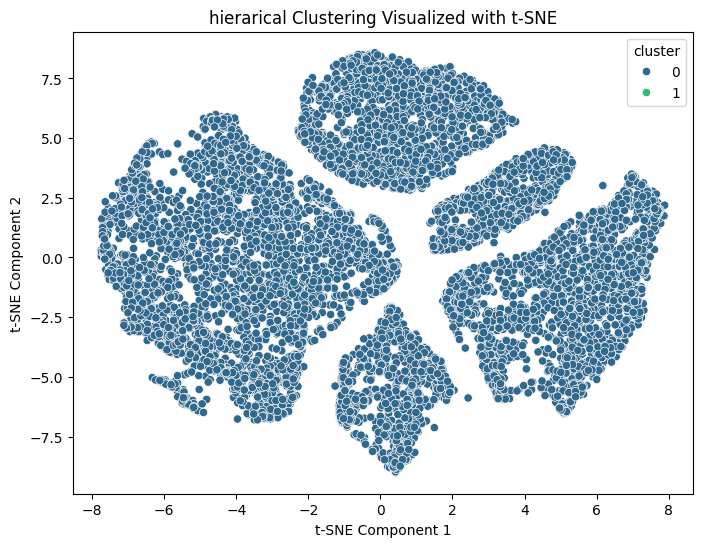

In [103]:
# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=Tsne_data_log, palette='viridis')
plt.title('hierarical Clustering Visualized with t-SNE')
plt.show()

The best one is the previouse  with number of cluster 5 with euclidean

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

In [125]:
pca = PCA(n_components=5)
pca.fit(df_copy_log)
df_copy_pca = pca.transform(df_copy_log)

In [126]:
df_copy_pca.shape

(8636, 5)

In [127]:
df_copy_pca = pd.DataFrame(df_copy_pca,columns=['C1','c2','c3','c4','c5'])
df_copy_pca

C1        c2        c3        c4        c5
0     -4.266830 -3.489672 -2.559071  0.628682  1.261196
1     11.375403  0.220149 -1.087596 -1.351158 -1.958639
2     -2.144637 -4.038188  5.727062 -1.808502  0.415186
3      0.573296 -6.556047  1.982904 -1.775899  0.390095
4     -6.810332  0.755614 -0.984831 -3.195448  0.831189
...         ...       ...       ...       ...       ...
8631  -0.257615 -8.370788  0.513011  3.204653  1.724001
8632  -6.013584 -2.445936 -2.621299  1.869215  0.206590
8633  -5.225412 -3.232700 -2.723234  1.826276  1.466498
8634   7.437119 -5.903101 -3.338141  3.228283  1.139271
8635   2.165072  0.326515  4.812343  3.846818  2.764562

[8636 rows x 5 columns]

log with pca

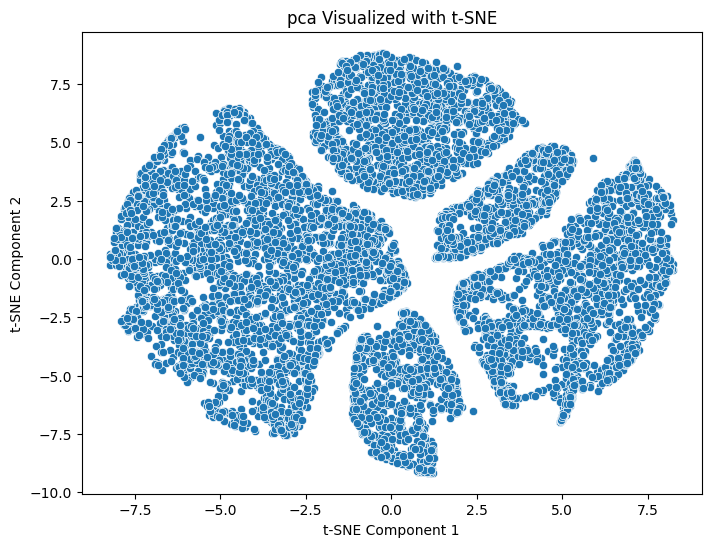

In [133]:
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy_pca)

Tsne_data_log = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=Tsne_data_log)
plt.title('pca Visualized with t-SNE')
plt.show()

In [155]:
final_df = df.copy()
final_df.dropna(inplace=True)
final_df.drop(columns=['CUST_ID'],inplace=True)
final_df['Cluster'] = hierarical.labels_

In [156]:
final_df.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        1

<Figure size 2000x300 with 0 Axes>

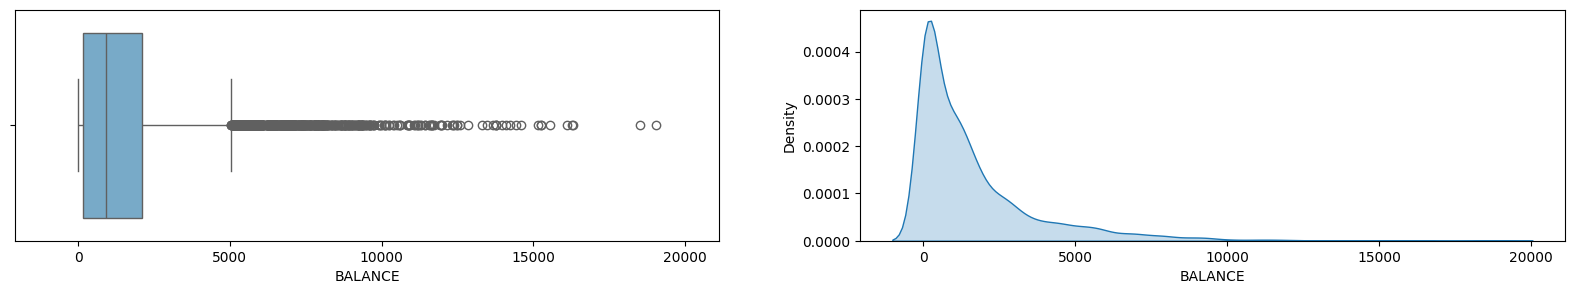

<Figure size 2000x300 with 0 Axes>

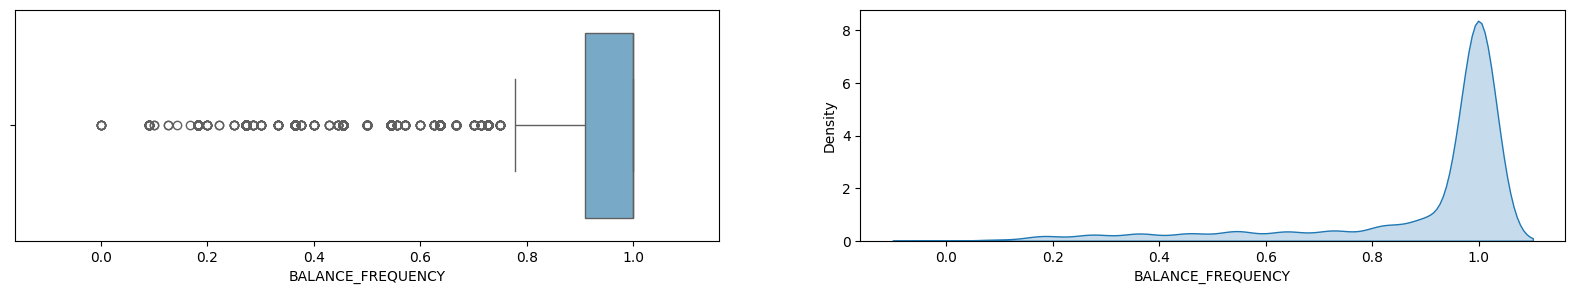

<Figure size 2000x300 with 0 Axes>

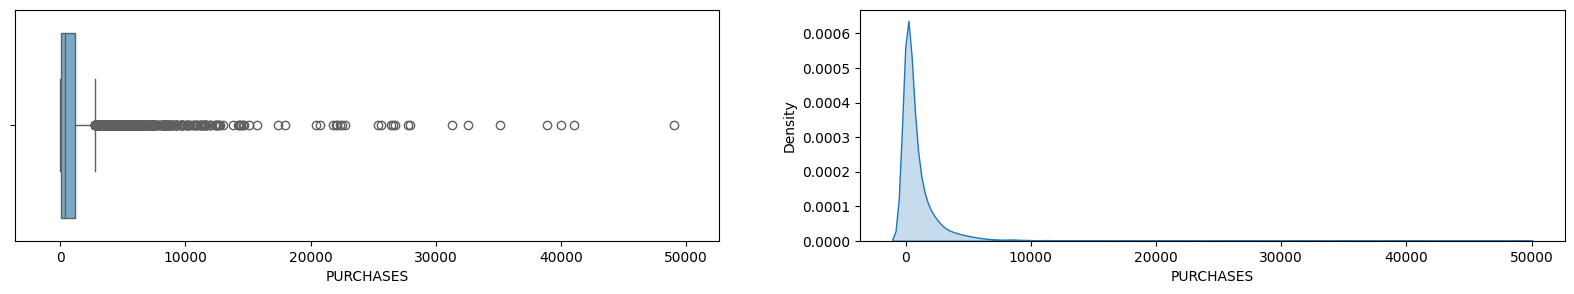

<Figure size 2000x300 with 0 Axes>

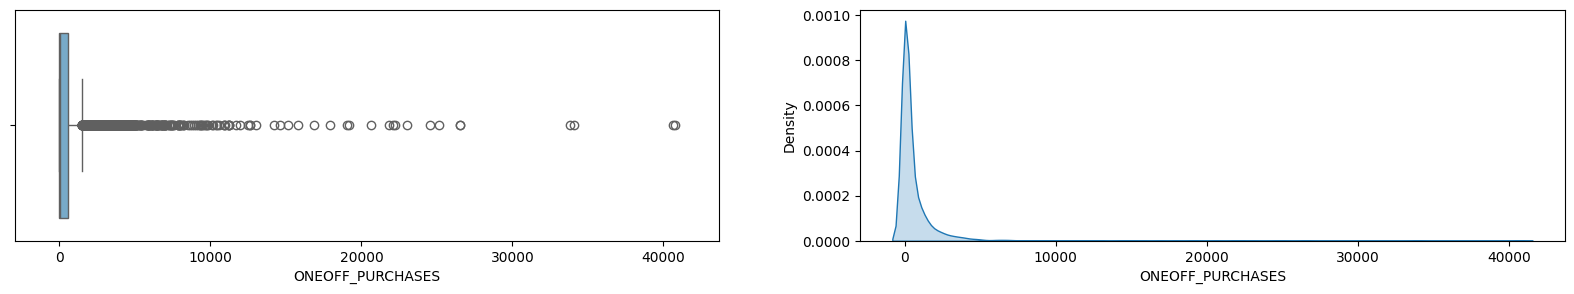

<Figure size 2000x300 with 0 Axes>

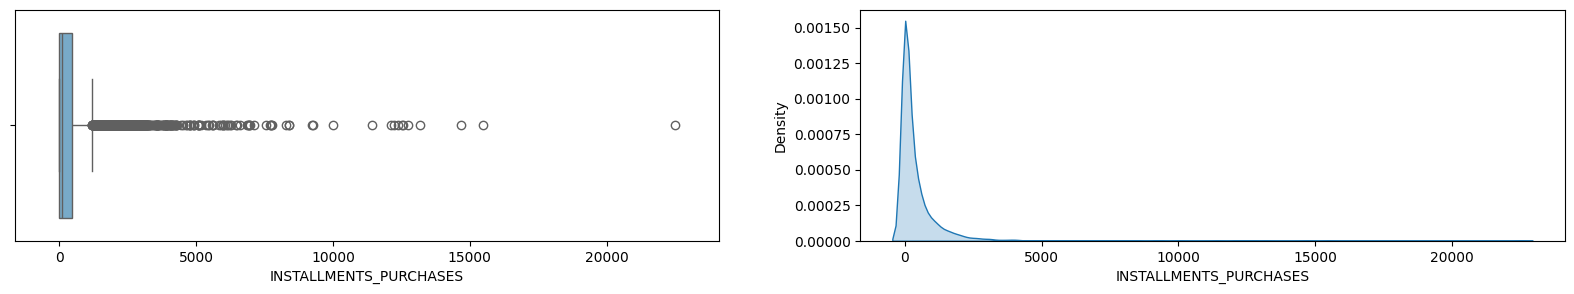

<Figure size 2000x300 with 0 Axes>

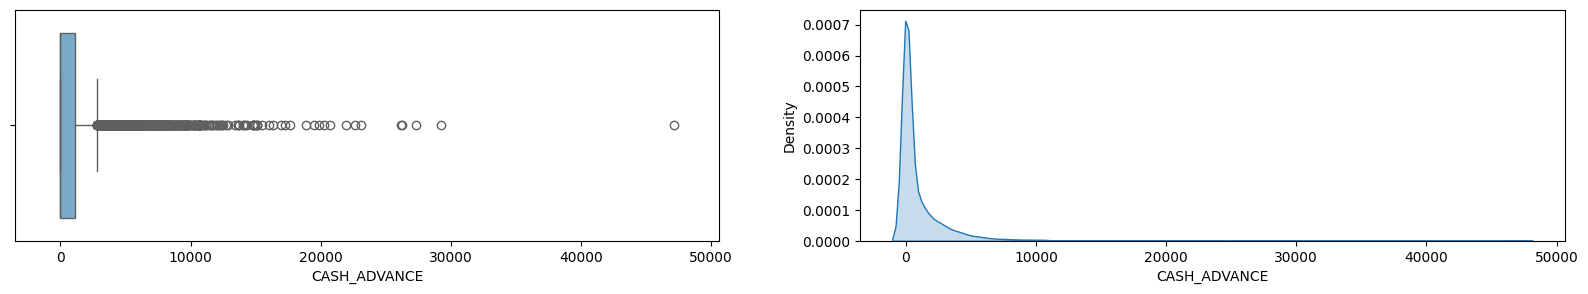

<Figure size 2000x300 with 0 Axes>

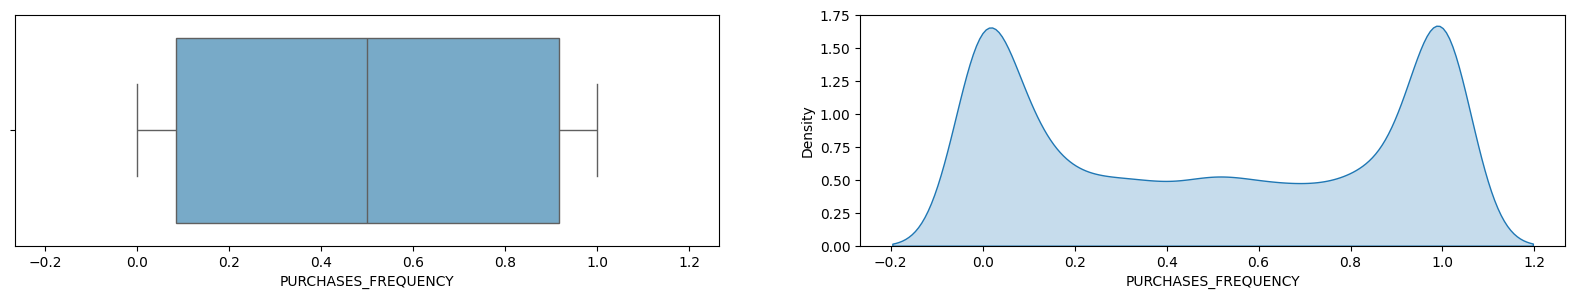

<Figure size 2000x300 with 0 Axes>

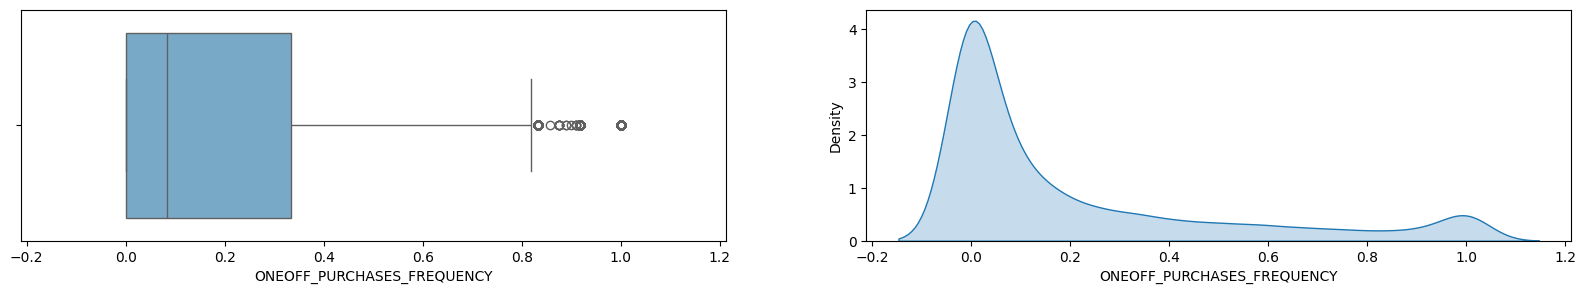

<Figure size 2000x300 with 0 Axes>

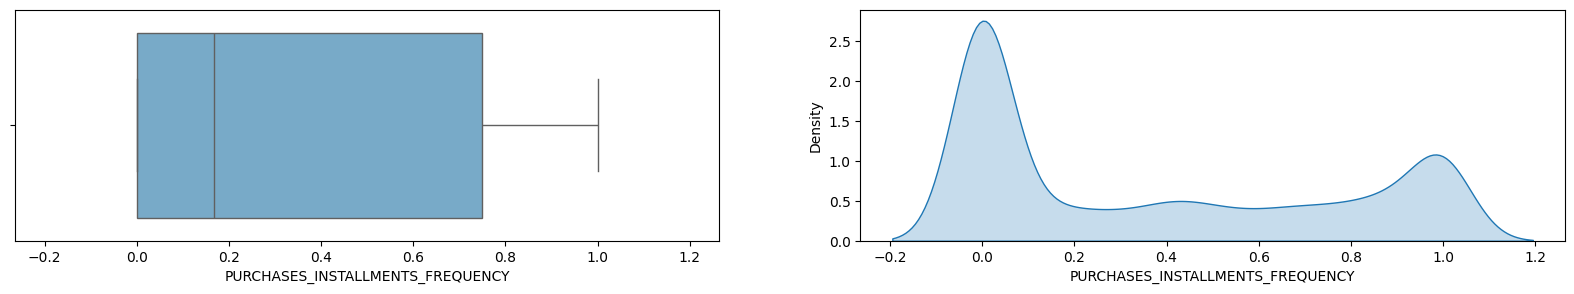

<Figure size 2000x300 with 0 Axes>

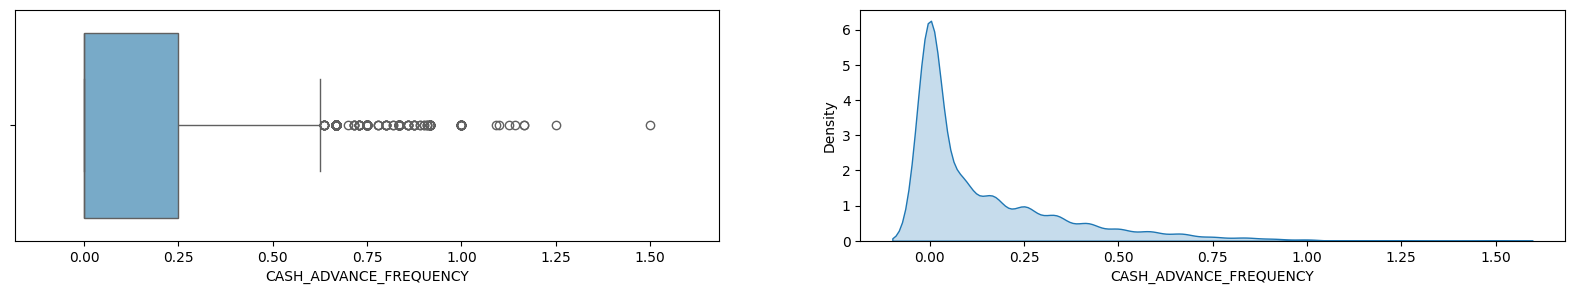

<Figure size 2000x300 with 0 Axes>

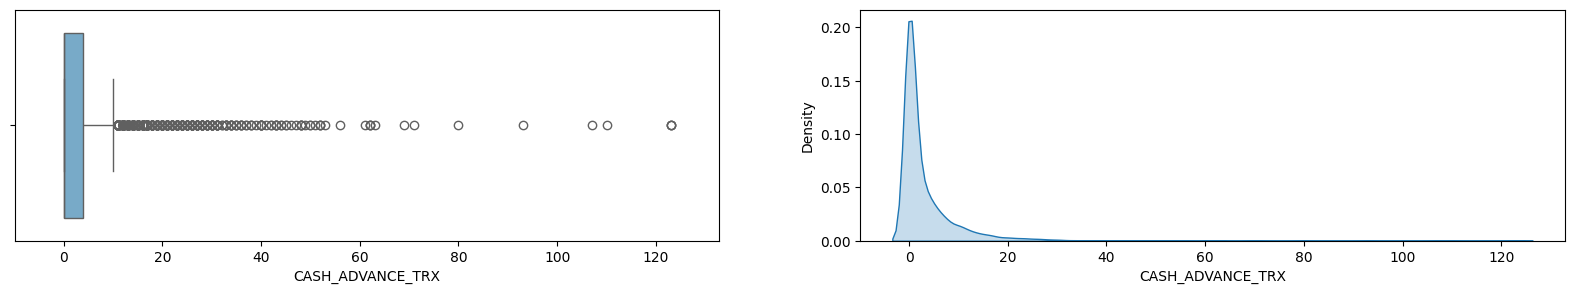

<Figure size 2000x300 with 0 Axes>

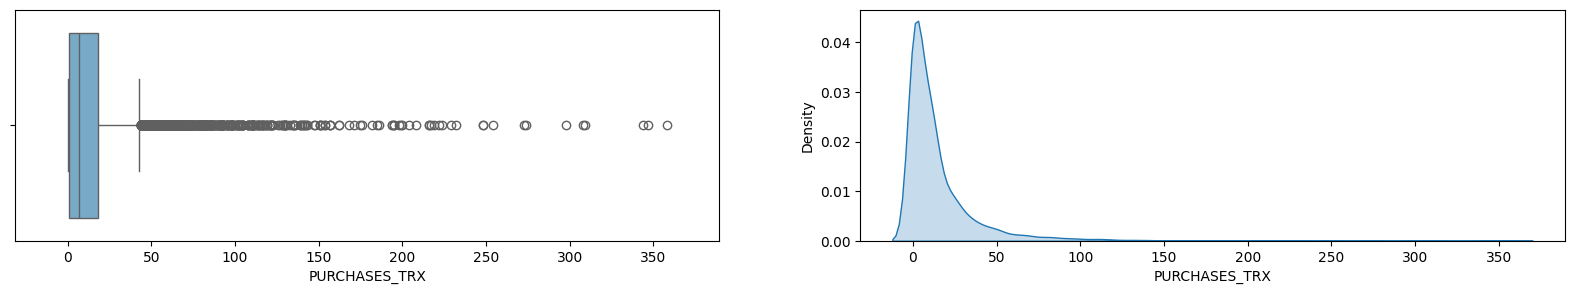

<Figure size 2000x300 with 0 Axes>

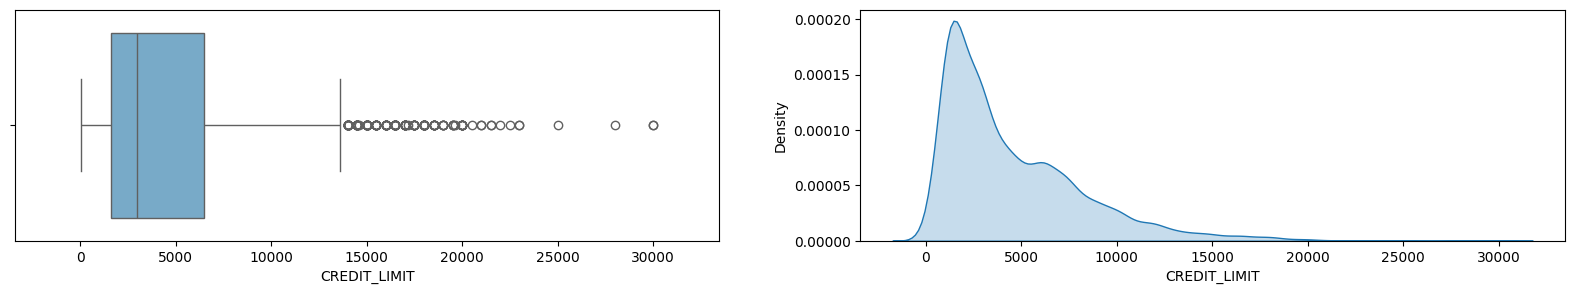

<Figure size 2000x300 with 0 Axes>

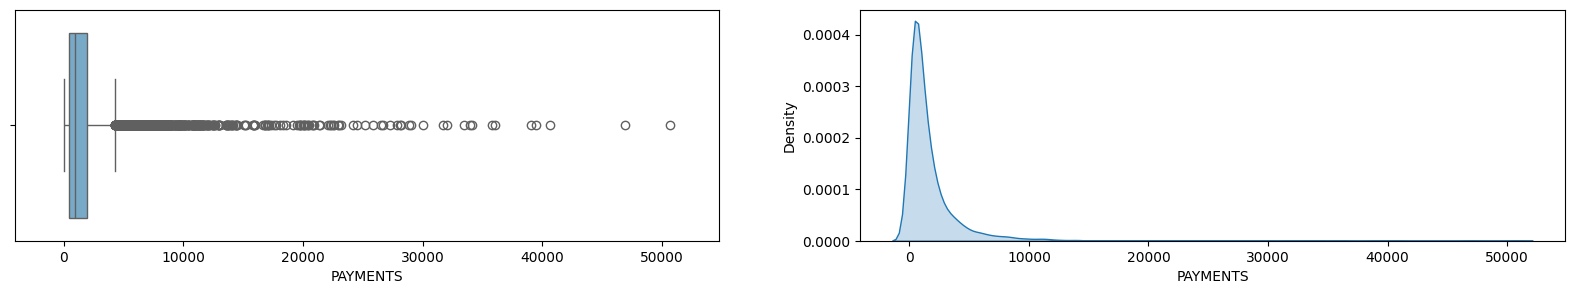

<Figure size 2000x300 with 0 Axes>

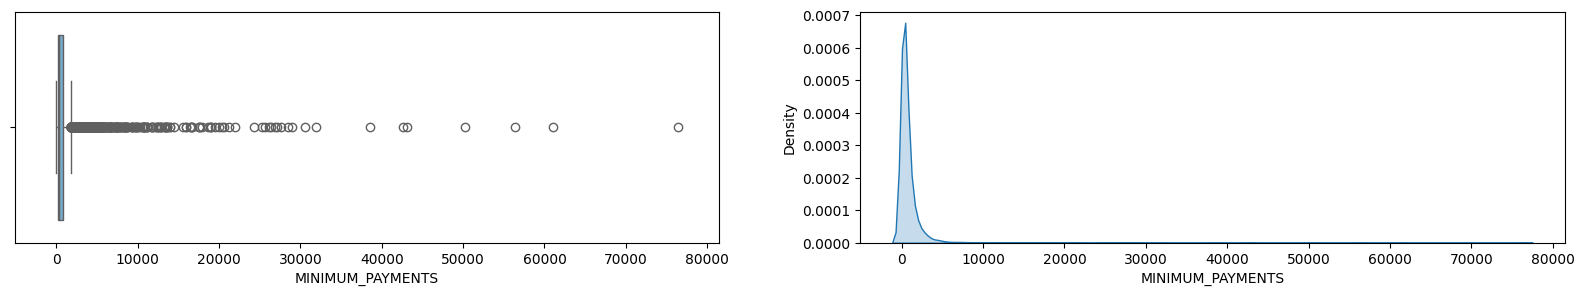

<Figure size 2000x300 with 0 Axes>

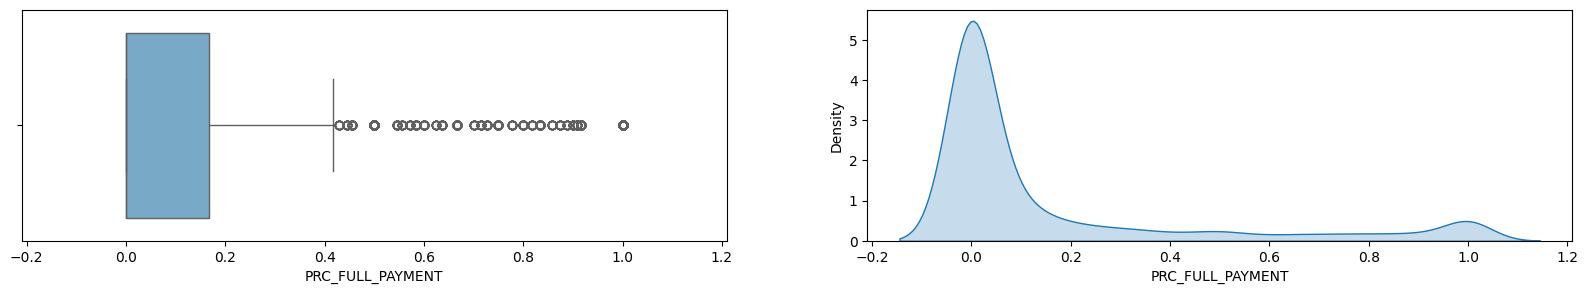

In [144]:
# Iterate through each column in the DataFrame
for col in list(final_df.columns):
    if final_df[col].nunique() > 7:
        plt.figure()

        rcParams['figure.figsize'] = (20, 3)

        # Create subplots with two axes (box plot and kernel density plot) sharing the x-axis
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)

        plt.gca().set(xlabel=col, ylabel='Density')

        # Create a box plot on the first subplot (ax_box)
        sns.boxplot(x=col, ax=ax_box, linewidth=1.0, palette='Blues', data=final_df)

        # Create a kernel density plot on the second subplot (ax_kde)
        sns.kdeplot(final_df[col], ax=ax_kde, fill=True, palette='Blues')

        # Display the plot
        plt.show()


In [141]:
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']

final_df.groupby('Cluster')[cols].mean()

PURCHASES  ONEOFF_PURCHASES  PURCHASES_FREQUENCY     PAYMENTS  \
Cluster                                                                    
0        1527.633094        766.563681             0.764743  1553.572910   
1         904.646507        904.739970             0.363002  1213.801858   
2           0.002064          0.002064             0.000257  1714.306674   
3        1501.831313        801.131614             0.740781  2708.601191   
4         670.719546        670.764578             0.278989  1981.522056   

         CASH_ADVANCE  CREDIT_LIMIT  INSTALLMENTS_PURCHASES  PURCHASES_TRX  \
Cluster                                                                      
0            0.000000   4429.922709              761.613800      23.487449   
1            0.000000   4420.806573                0.000000       8.017910   
2         2012.841754   4052.696078                0.044092       0.005071   
3         2080.542106   5366.218270              701.114172      24.858413   
4         2042.312994   4663.585662                0.000000       6.417639   

         CASH_ADVANCE_TRX  CASH_ADVANCE_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                                         
0                0.000000                0.000000                    0.233291   
1                0.000000                0.000000                    0.362339   
2                6.410243                0.276703                    0.000257   
3                7.273598                0.282638                    0.273117   
4                6.931258                0.297634                    0.278881   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY     TENURE  
Cluster                                                                       
0                                0.663757                0.000000  11.658202  
1                                0.000332                0.000000  11.608955  
2                                0.000127                0.276703  11.360548  
3                                0.622789                0.282638  11.528728  
4                                0.000000                0.297634  11.342412

**cluster 0**
- Customers in Cluster 0 demonstrate a preference for making purchases in installments rather than opting for cash advances.
- Around 76% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern

**cluster 1**
- Customers in Cluster 1 exhibit a preference for making one-off purchases rather than opting for installment payments.
- Customers in this cluster generally avoid purchases in installments, suggesting a preference for immediate payment rather than spreading payments over time.
- The mean amount of total purchases is $904, reflecting the tendency for one-off purchases with a moderate spending amount.

**cluster 2**
- Customers in Cluster 2 demonstrate a preference for using cash advances rather than making purchases in installments.
- The majority of purchases made by customers in this cluster are through cash advances, indicating a reliance on immediate funds rather than installment payments.
- The mean amount of cash advances taken by customers in this cluster is $2011. This suggests that, on average, customers in Cluster 2 rely on relatively large cash advances to meet their immediate financial needs.

**cluster 3**
- Customers in Cluster 3 demonstrate a preference for making purchases both in installments and through cash advances.
- Around 74% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern.
- The mean amount of cash advances taken by customers in this cluster is $2080.54, suggesting a reliance on immediate funds for their purchases.

**cluster 4**
- Customers in Cluster 4 demonstrate a preference for using cash advances rather than making purchases in installments.

- The mean amount of purchases made by customers in this cluster is $669, indicating a moderate level of spending on purchases.

- Customers in this cluster tend to make fewer purchase transactions, with a mean of approximately 6 transactions.

In [163]:
# prompt: i need to convert this file to html

!jupyter nbconvert --to html customer_segmentation_for_marketing_Amina_Mohamed.ipynb



[NbConvertApp] WARNING | pattern 'customer_segmentation_for_marketing_Amina_Mohamed.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jup